In [58]:
from IPython.display import Image, display

## Is there something going on with goats and $\alpha$?

I think that I can construct an analogy that is simple enough to think about, yet retains all of the relevant pieces to solve a problem in astrophysics. Meaning, if you can think through how to solve this analogy, we will then be able to use the same reasoning and methods to solve the astrophysics case.

Here is the analogous problem.

Imagine a strange planet -- similar to Earth in many ways except that it is covered with grass and rolling hills everywhere. The only inhabitants of this planet are about ~30 species of goats (I know it should probably be breeds, but work with me). Each of these species of goats appears on hills all over the planet (and each goat lives its entire life on the particular hill that it was born on). The goats eat a mixture of grass and hay and alfalfa ($\alpha$), and this mixture is fixed per hill (but in principle it could have different mixtures at each hill). 

The happy goats might look like: 

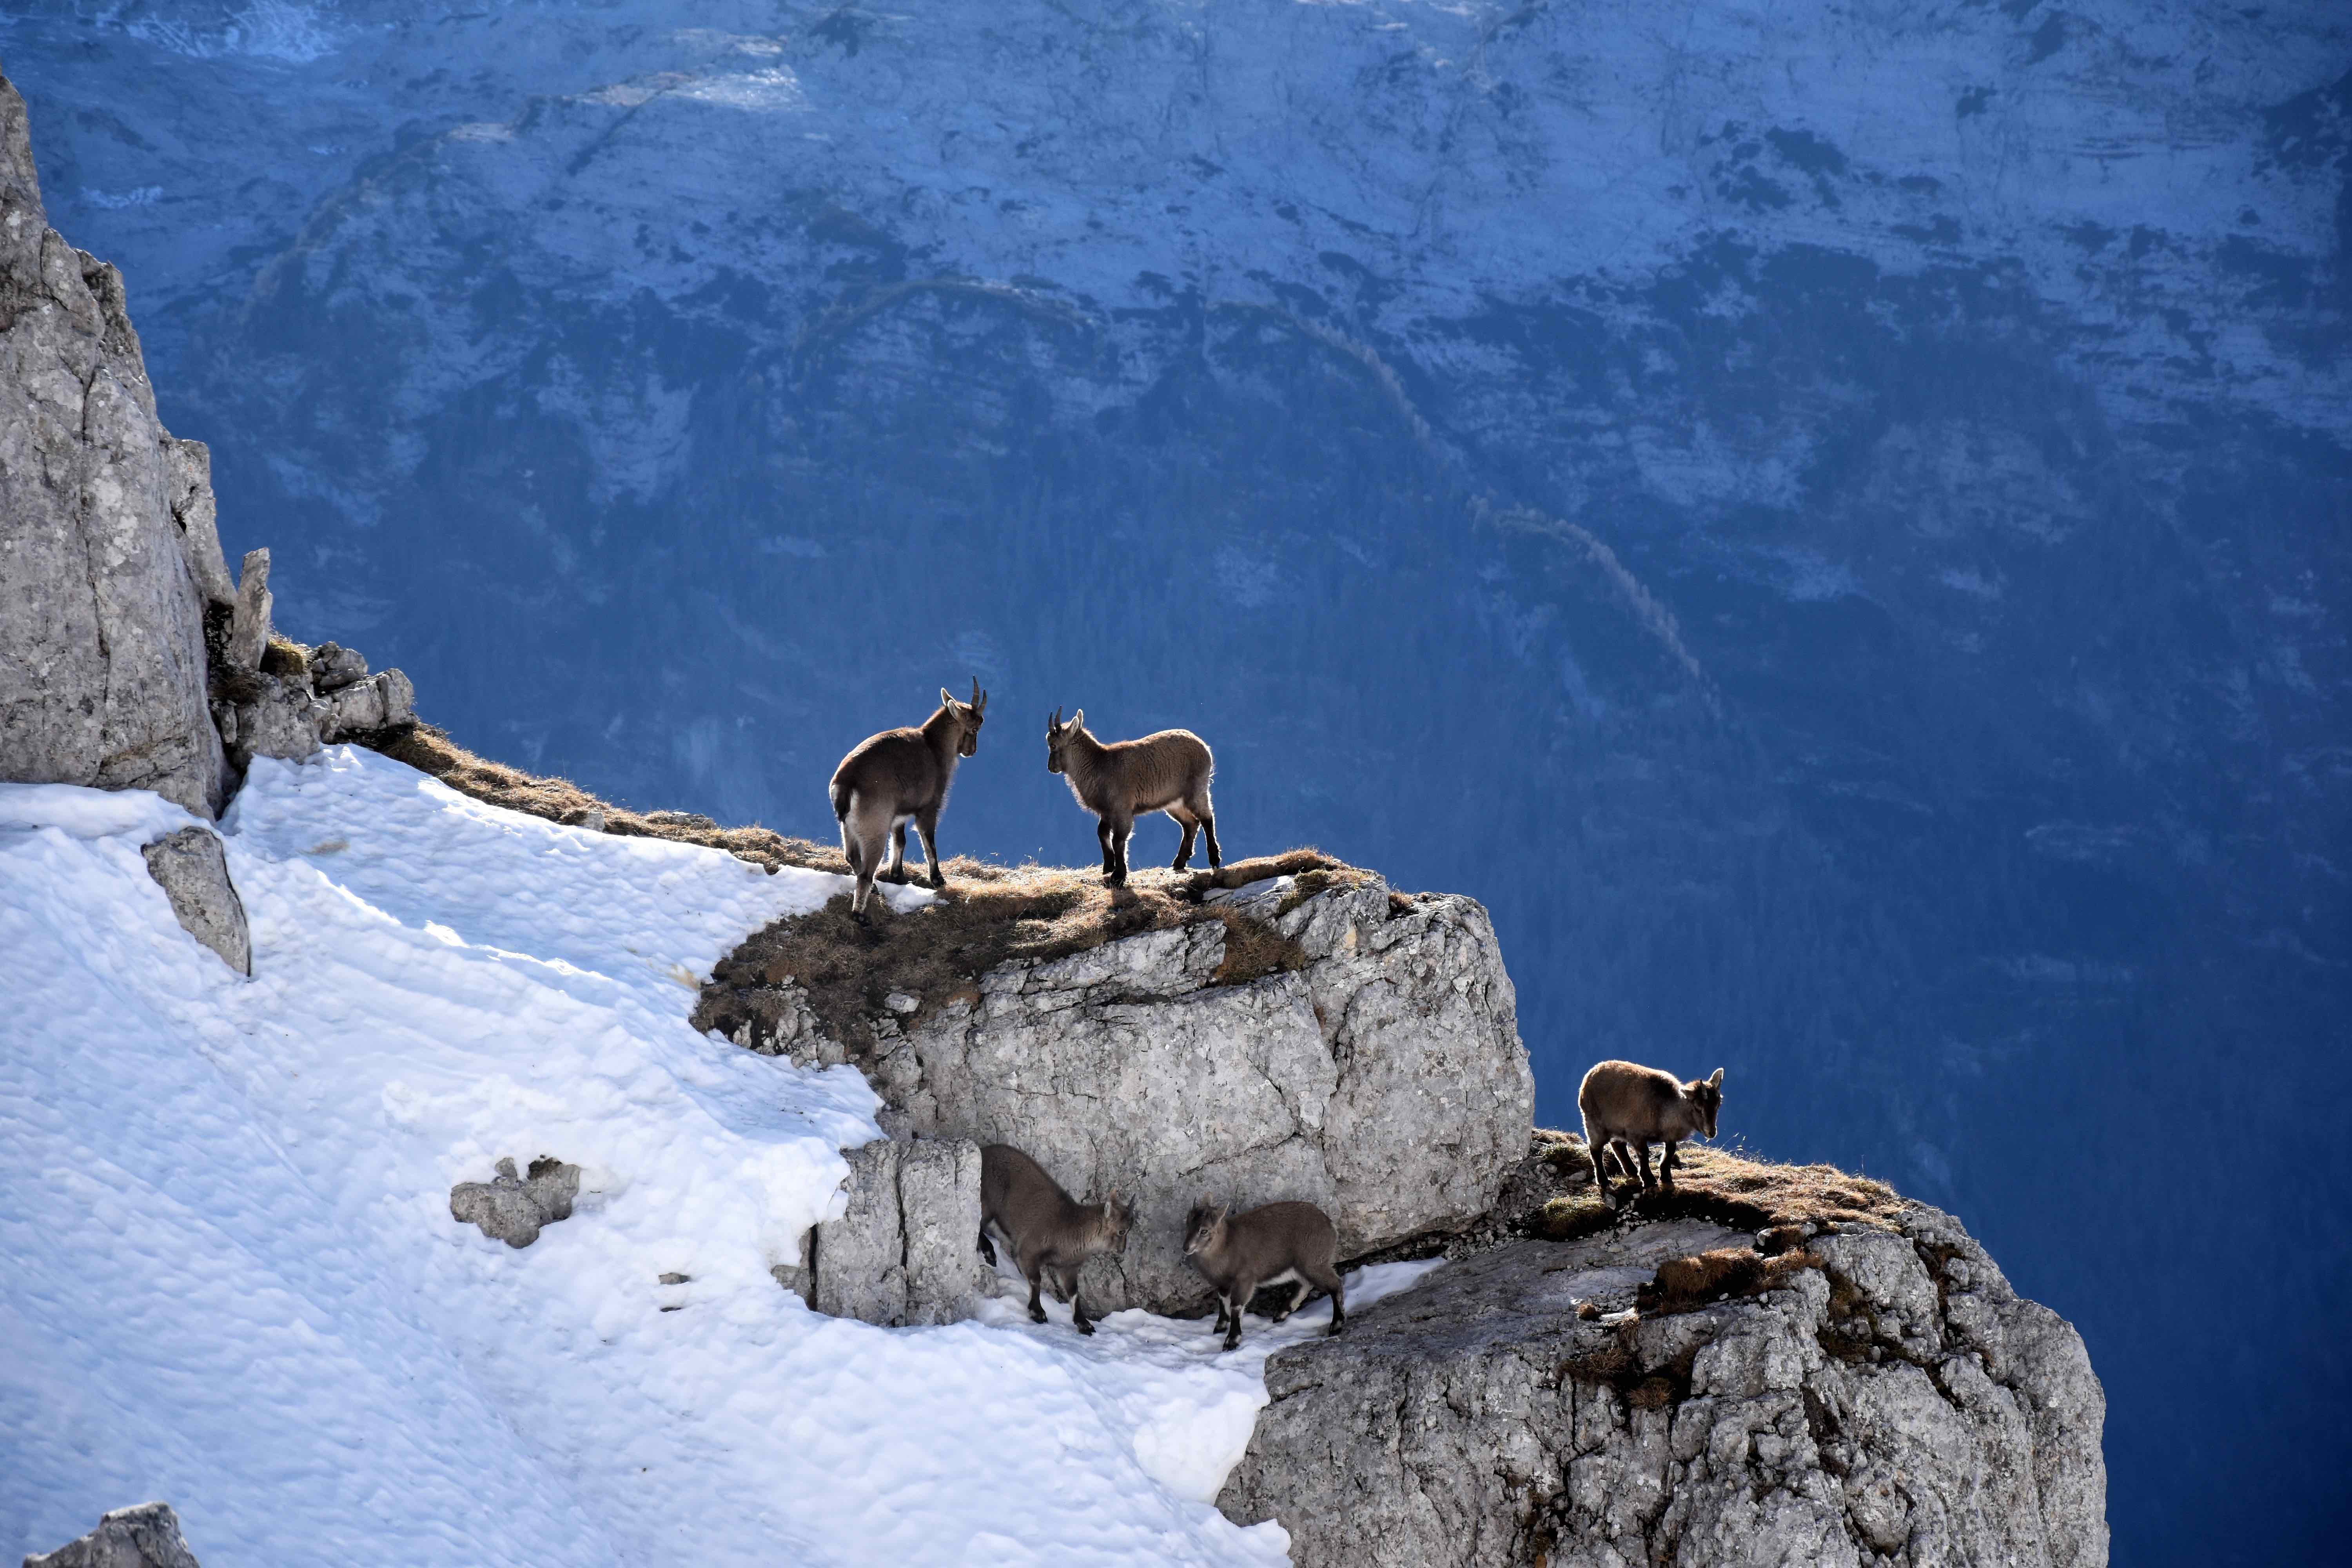

Image Credit: Medena Rosa https://unsplash.com/@daisy66


In [59]:
display(Image("../img/goats-on-a-hill.jpg"))
print("Image Credit: Medena Rosa https://unsplash.com/@daisy66")

Let's assume that each species of goat grows to a known precise height on Earth, and that identifying each species is trivial.

The goat's Earth height - data might look like: 

| species | height [m] | 
| -- | -- | 
|A | 1.3020405 | 
|B | 2.1000003222| | 

It turns out that for each of the species of goat, the final height they grow to depends on one parameter only: the relative concentration of ($\alpha$), and these height measurements were based on the concentration of $\alpha$ on Earth. Let's center this relative measure on zero so that we're thinking about the difference in this value. So a $\Delta \alpha/\alpha_{Earth} = 0$ means that the concentration is the same as on Earth. I'll use `daa` as shorthand for $\Delta \alpha/\alpha_{Earth}$. Elaborating, a `daa = 0.05` means that the concentration of alfalfa is 5% _higher_ on this planet than Earth, while `daa = -0.05`  means that the concentration of alfalfa is 5% _lower_ on this planet than Earth.

Further, there is a well-established and well-motivated theory that connects `daa` and the respective heights. Again, for each species, there is a parameter the ties in how sensitively their final height will be for a given `daa`. Let's call those `q-values` and for each species, there is a $q_a = 1000$ (strongly positive), $q_b = -750$ (strongly negative), and $q_c = 3$ (very insensitive to `daa`). This gives us a formula: 

$$\Delta v_i = daa * q_i$$

for the **v**ertical change in height for each species (i) for a given `daa` value and scaled by its corresponding `q-value_i`. 

Hopefully I have confused neither you nor myself with this analogy so far.

These goats have another trick up their sleeve -- it turns out that they wear altimeters on their heads, which will send out altitude of their head to nanometer precision. Remember, however, that this planet has rolling hills, and we care to the nanometer scale about their relative _heights_ not their _altitudes_. 

In an attempt to measure the value of $\alpha$ on these different hills, scientists went to locations all over this planet and measured these goats. Device K made measurements in roughly the Northern hemisphere, and Device V made measurements in the roughly Southern hemisphere. The scientists took measurements of the goats they found on various hills by having the goats stand on a single plank of very smooth and very flat wood (Device K), or two pieces of very smooth and very flat wood (for Device V). Once the goats were standing on the wood, they recorded the altitude measurement of each goat, and moved on to the next hill.

A total of 293 measurements were taken: 140 measurements with K, and 153 measurements with V.

In principle, the data could look something like this:

| site | species | altitude [m] | error [m]| 
| -- | -- | -- | 
| site_PHL957 | A | 6382507.0023141 | 0.0000003 | 
| site_PHL957 | B | 6382506.1312993 | 0.0000008 | 
| site_PHL957 | F | 6382507.1233276 | 0.0000003 | 
| site_PHL957 | G | 6382508.8100211 | 0.0000005 | 
| site_J2000 | B | 6382205.2741312 | 0.0000006 | 
| site_J2000 | E | 6382203.3621233 | 0.00000035 | 
| site_J2000 | R | 6382204.5678100 | 0.0000004 | 

But, because the value they were most interested in was this `daa` value, they fit the respective altimeters in each of these measurements to give a single `daa`, and reported it like this: 

| site | daa | error | 
| -- | -- | -- | 
| site_PHL957 | -1.2e-6 | 2.1e-6 | 
| site_J2000 | 2.6e-6 | 5.2e-6 | 

Obviously the altitude doesn't matter, but since the hypothesis was to check for a possible `daa` they fit a model to the relative heights for a best-fit `daa`.

Further, they found that looking at measurements from K, that the values of `daa` were slightly negative, while measurements from V found slightly positive. So they fit a dipole to the data (the alfalfa concentrations were highest in, say Europe and lowest in Australia). This gives a 1-parameter model for the relative concentration of $\alpha$ as a function of position on the planet (given by angle from the location from the peak `daa` location).

$$daa = A * \cos(\theta) + B)$$

with $A$ being the dipole coefficient, $B$ being the monopole [or constant offset term], and $\theta$ being the angle between the peak and the point under consideration. 

Later, a scientist working with these devices found some problems with the pieces of wood used to bring the goats to the same altitude. The two-pieces of wood were particularly tricky to align and sometimes there would be a slight tilt to the levels. Fitting for the best-fit `daa` assumes that `daa` is the best model to fit discrepant relative heights. 


## The task at hand

The way that the scientists measure `daa` can actually give a best-fit for relative v-shifts. What that means is that there is a mode that allows them to re-run these measurements, getting $\Delta v$ and errors for each species. Is there a statistically rigorous way to go from altitudes to testing whether a global `daa` model is a better fit to the data, or whether two systematic effects are a more likely _explanation_ of the data?


So, I can generate data in any combination of the two following ways: 

  A. generate data (with noise) from a model that has a non-zero `daa` value, and 
  B. generate data (with noise) from a model that has a systematic error in the measuring device.

Note that for each system, one of the vshifts is set to zero (and the remaining vshifts are relative to that).
The data will be available in the following form:

In [200]:
sys0a

system          #J2000 source   wavelength      vshift      sigma    qval  \
1        0  J000149-015940   Keck  5171.257827    0.000000  62.167126   270.0   
2        0  J000149-015940   Keck  4725.312789   62.007272  64.585653    47.0   
3        0  J000149-015940   Keck  5595.981560   -7.242025  55.136028   526.0   
4        0  J000149-015940   Keck  6364.330443 -130.203369  60.892969 -1110.0   
5        0  J000149-015940   Keck  6382.826953  -64.161215  75.407935 -1168.0   
6        0  J000149-015940   Keck  6394.983372 -132.597043  58.140072 -1360.0   
7        0  J000149-015940   Keck  4978.316232  -99.474564  79.955683 -1165.0   
8        0  J000149-015940   Keck  5291.395402   36.434070  62.883790   -20.0   
9        0  J000149-015940   Keck  5390.280350   20.323841  74.996257 -1400.0   
10       0  J000149-015940   Keck  5422.353633   -5.212064  55.970077  -700.0   
11       0  J000149-015940   Keck  6271.096907   27.540317  57.799044  2488.0   
12       0  J000149-015940   Keck  6384.140359  103.311666  52.630599  1585.0   

      rest_wave             x  
1   1670.788610 -2.704805e+14  
2   1526.707631 -4.302337e+13  
3   1808.013169 -5.702142e+14  
4   2056.260038  1.368522e+15  
5   2062.236100  1.444215e+15  
6   2066.163734  1.684823e+15  
7   1608.450852  1.123529e+15  
8   1709.604020  2.050106e+13  
9   1741.552890  1.461892e+15  
10  1751.915490  7.352955e+14  
11  2026.137090 -3.022525e+15  
12  2062.660450 -1.960233e+15

And can be plotted in two "spaces", wavelength space (which would be where the goats were standing on the wooden plank space), or x space (the slope of which would be 

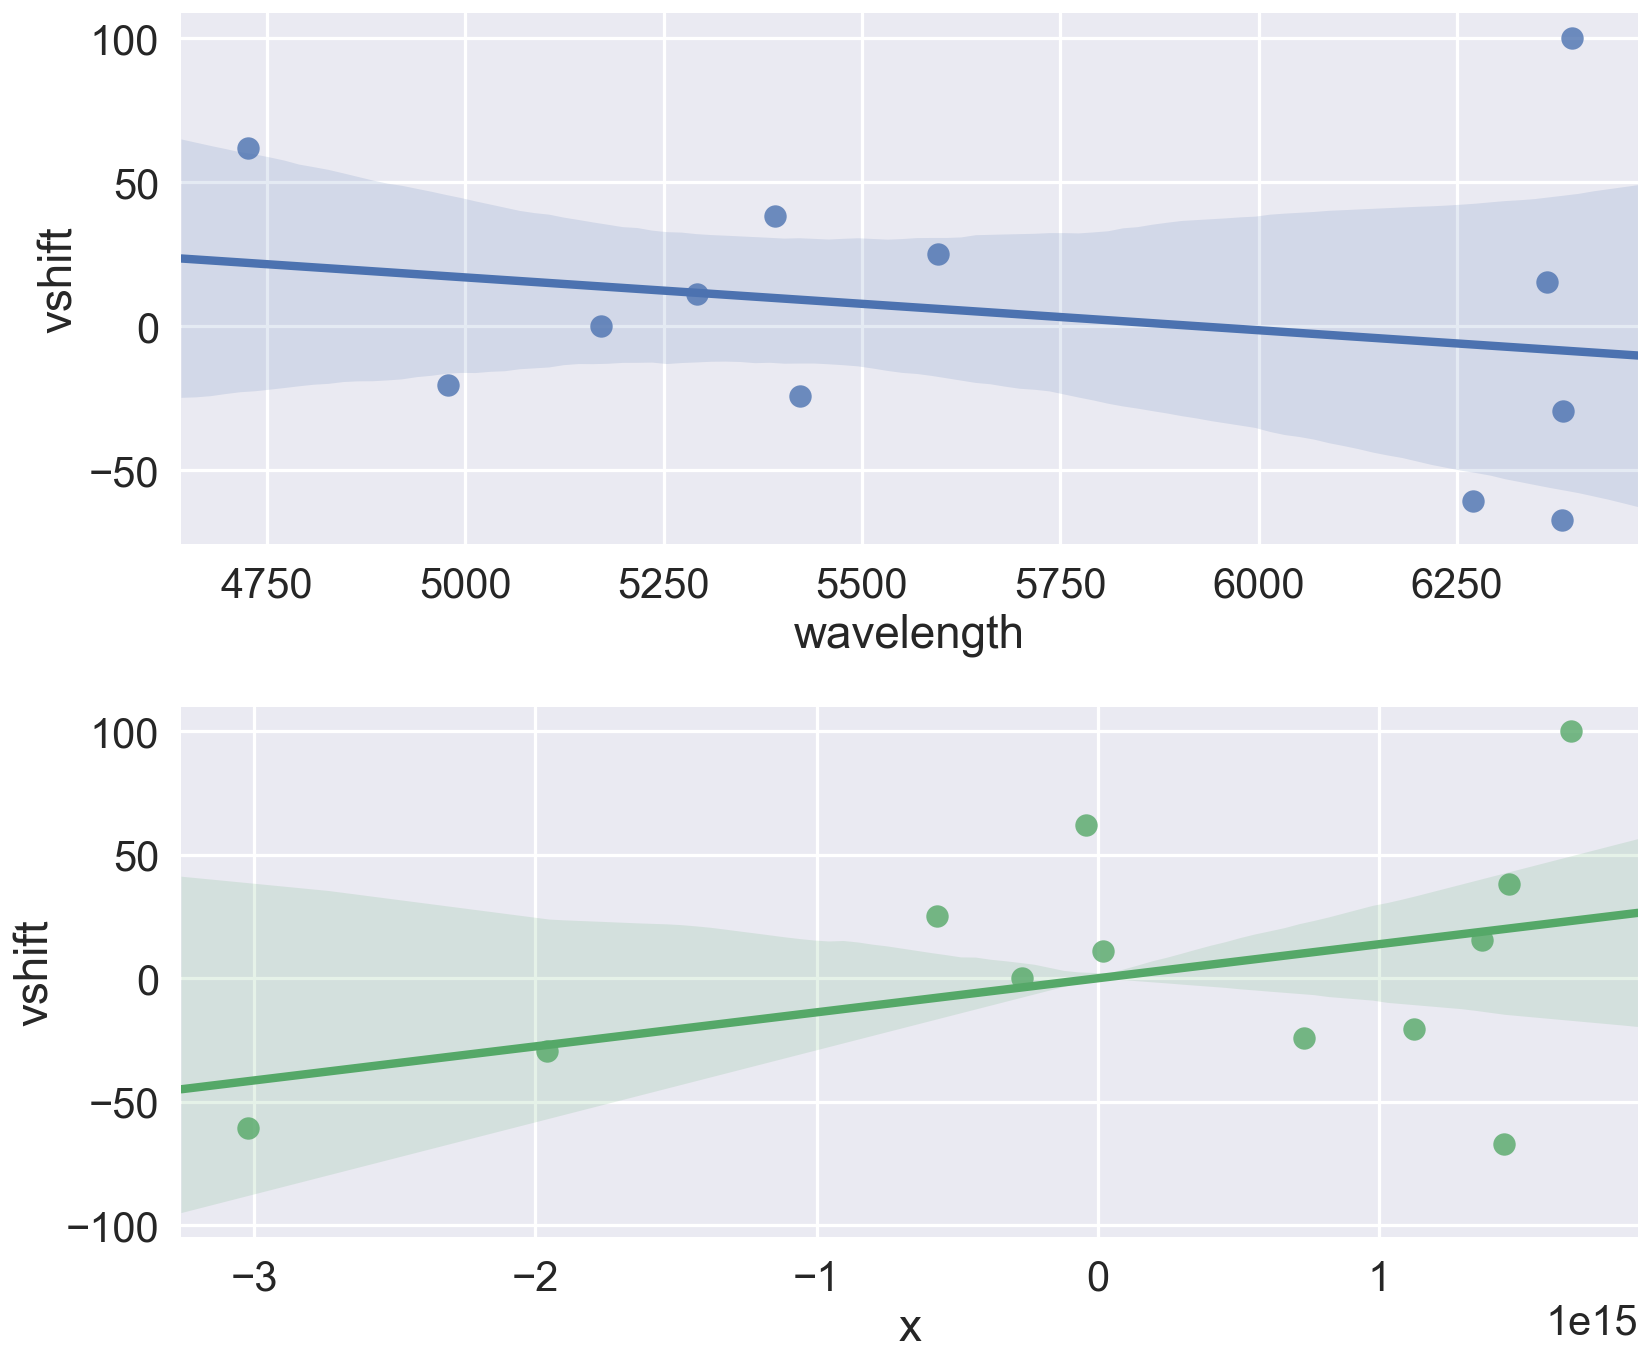

In [201]:
Image("../img/xvswave.png")

**Given some data of the similar form, can you devise a test that quantifies the relative likelihood of either hypothesis A or hypothesis B?**

In [127]:
def VLT_distortion(measured_wave, cutoff=5000.):
    slope1 = .0600
    intercept1 = -100
    slope2 = .160
    intercept2 = -1500
    if measured_wave < cutoff:
        return measured_wave * slope1 + intercept1
    else:
        return measured_wave * slope2 + intercept2

def Keck_distortion(measured_wave):
    return 0.0
    
def distorted_velocity(row, measured_wave):
    if row.source == "VLT":
        return VLT_distortion(measured_wave)
    elif row.source == "Keck":
        return Keck_distortion(measured_wave)

In [103]:
DIP_RA = 17.3
DIP_RA_ERR = 1.0
DIP_DEC = -61.0
DIP_DEC_ERR = 10.0
DIP_AMPLITUDE = 0.97e-5
DIP_AMPLITUDE_ERR = 0.21e-5 # average of asymmetric errors
DIP_MONOPOLE = -0.178e-5
DIP_MONOPOLE_ERR  = 0.084e-5

dipole = SkyCoord(DIP_RA, DIP_DEC, unit=(u.hourangle, u.deg))

In [104]:
def parse_j2000(name):
    return ' '.join([name[1:3], name[3:5], name[5:7], name[7:10], name[10:12], name[12:]])

In [102]:
def dipole_alpha(name):
    c = SkyCoord(parse_j2000(name), unit=(u.hourangle, u.deg))
    theta = float(c.separation(dipole).to_string(decimal=True))
    return (DIP_AMPLITUDE * np.cos(np.deg2rad(theta)) + DIP_MONOPOLE) * 1e6

In [138]:
# \omega_0 in cm^{-1}
# 62171.623009591349 = 1.0e8 / qvals.loc['FeII1608'].wave
# q in cm^{-1}
daa = -5e-6

In [187]:
def generate_dataset(gen_dipole_alpha=True, 
                     wavelength_distortion=False,
                     seed=228,
                    ):
    df = pd.DataFrame(columns=['system',
                               '#J2000',
                               'source',
                               'wavelength',
                               'vshift', 
                               'sigma', 
                               'qval',
                               'rest_wave'
                              ])
    count = 0
    abs_count = 0
    for index, row in full_parse.iterrows():
        waves = []
        rest_waves = []
        vshifts = []
        qvals_list = []
        for tran in row['transition'].split():
            vshift = 0.0
            rest_wave = qvals.loc[codes.loc[tran].trans].wave
            measured_wave = rest_wave * (1 + row.zabs)
            qval = qvals.loc[codes.loc[tran].trans].qval
            if gen_dipole_alpha:
                vshift += shifted_velocity(dipole_alpha(row['#J2000']),
                                           qval,
                                           rest_wave)
            if wavelength_distortion:
                vshift += distorted_velocity(row, measured_wave)
            waves.append(measured_wave)
            rest_waves.append(rest_wave)
            vshifts.append(vshift)
            qvals_list.append(qval)
        vshifts = np.array(vshifts)
        errors = sigmas(vshifts)
        vshifts += errors * np.random.randn(len(vshifts))
        vshifts = vshifts - vshifts[0]
        for single in range(len(vshifts)):
            abs_count += 1
            df.loc[abs_count] = [int(index), #system
                                 row['#J2000'], #j2000
                                 row.source,
                                 waves[single], #wavelength 
                                 vshifts[single],
                                 errors[single],
                                 qvals_list[single], # qvalues
                                 rest_waves[single],
                                ]
    df['system'] = df.system.astype(int)
    df['x'] = -2.0 * c * df['qval'] * df['rest_wave']
    return df

In [188]:
full_parse.head()

#J2000   zem     zabs     da    eda sample source  sigflag  \
0  J000149-015940  2.31  2.09510   0.34   7.27     B1   Keck        2   
1  J000149-015940  2.31  2.15390  36.05  39.54     B1   Keck        1   
2  J000322-260316  4.11  1.43420 -12.53  11.67      C   Keck        1   
3  J000322-260316  4.11  3.38970 -78.43  35.48      C   Keck        1   
4  J000520+052410  1.90  0.59137 -31.05  24.33      C   Keck        1   

   imrotator               transition  
0          0  d g h i j k l s t u v w  
1          0                  d f g l  
2          1                  b c p r  
3          1                  d g l m  
4          0              b c n p q r

In [189]:
df = generate_dataset()

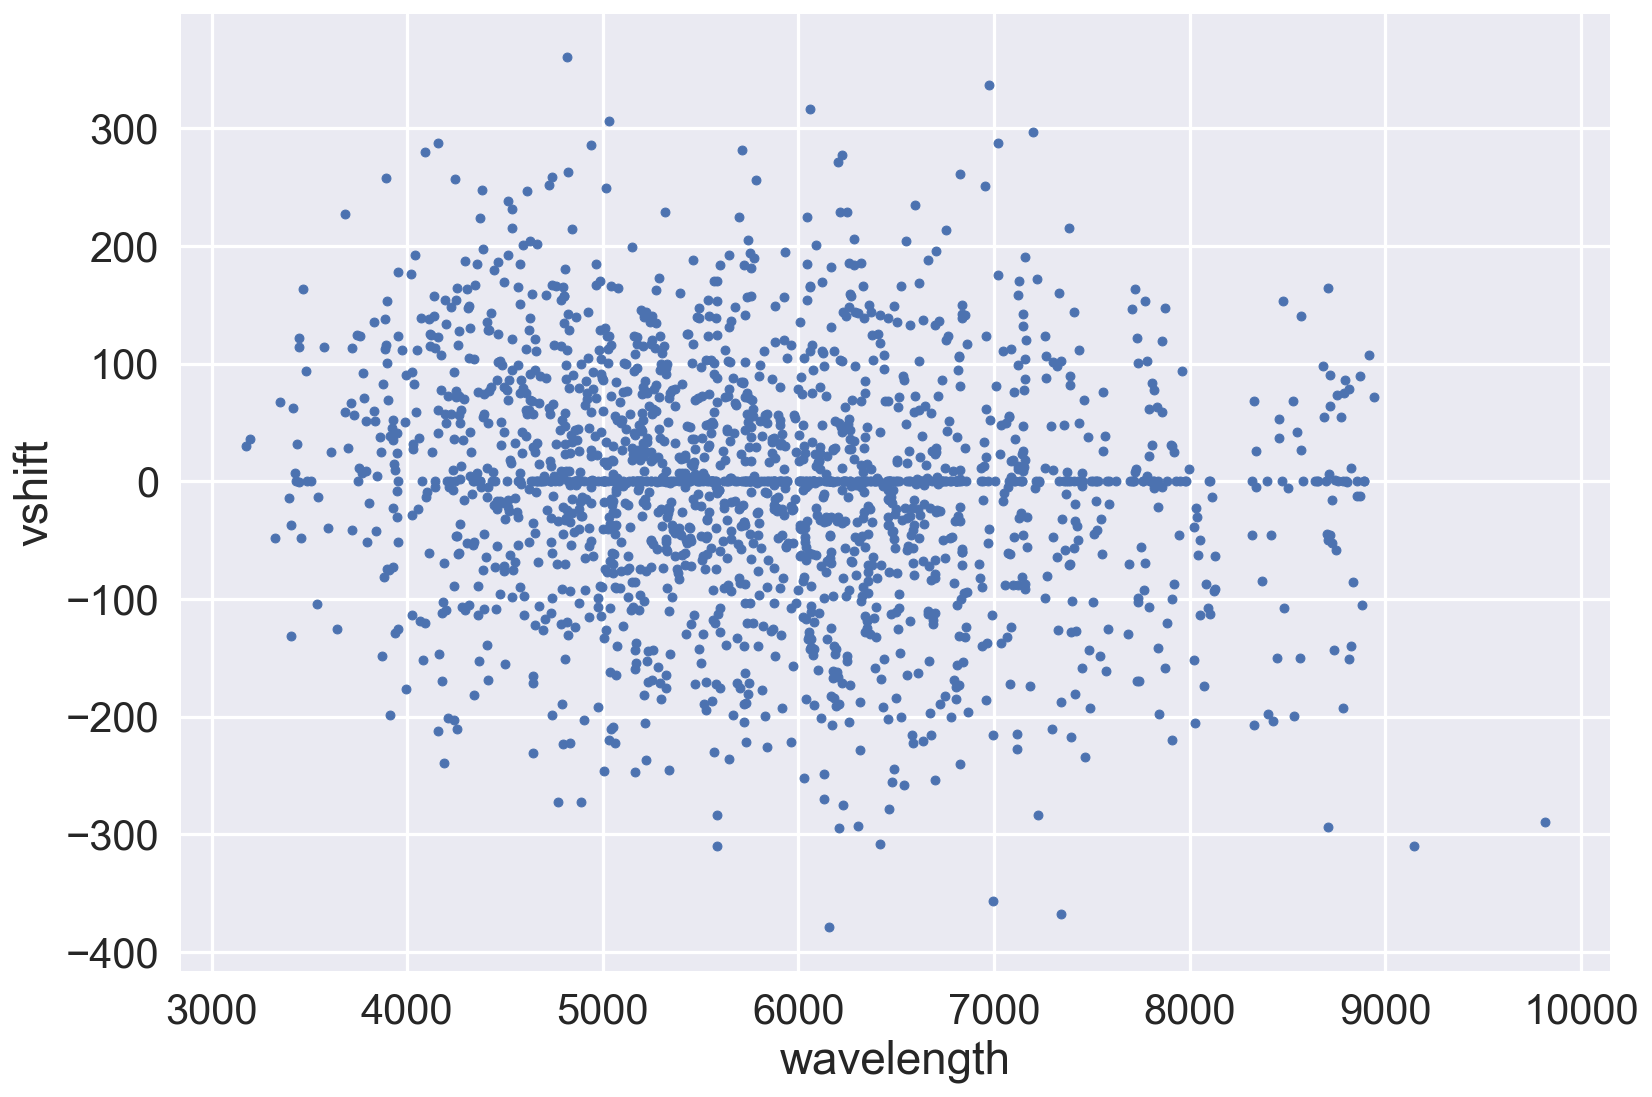

In [190]:
df.plot.scatter('wavelength', 'vshift')

In [191]:
df2 = generate_dataset(gen_dipole_alpha=False, wavelength_distortion=True)

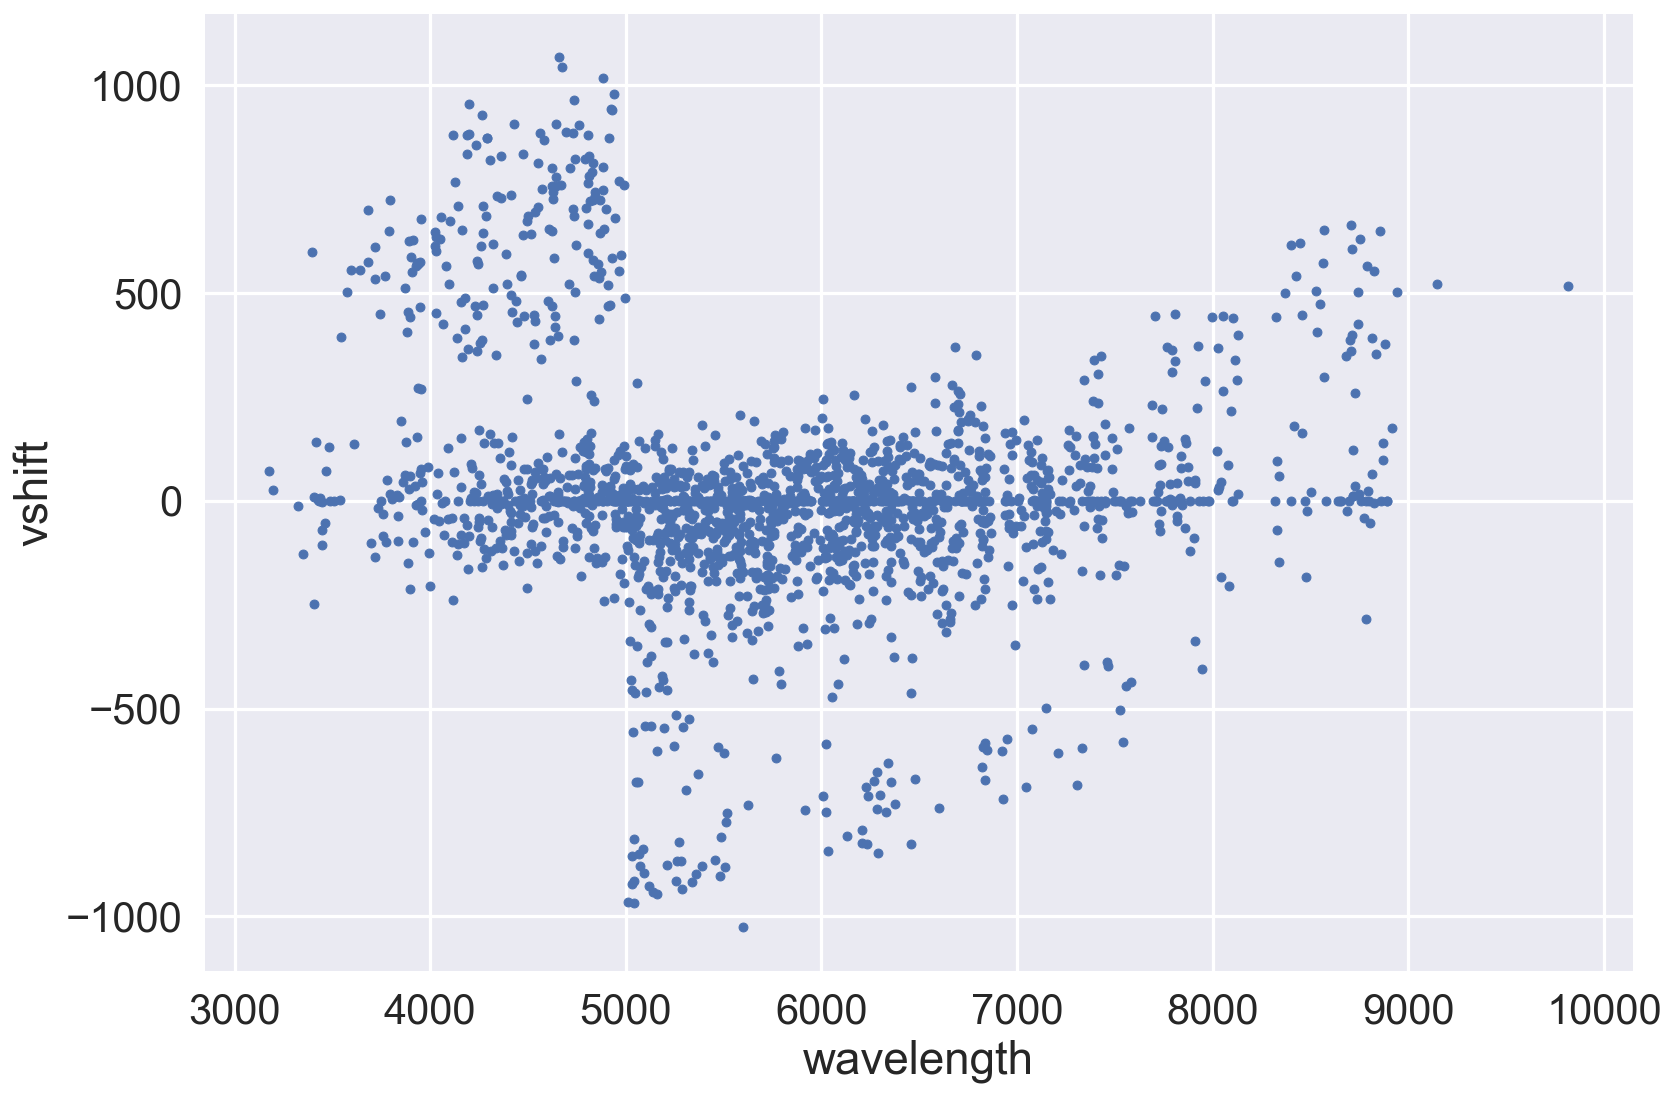

In [192]:
df2.plot.scatter('wavelength', 'vshift')

In [193]:
df.head(20)

system          #J2000 source   wavelength      vshift      sigma    qval  \
1        0  J000149-015940   Keck  5171.257827    0.000000  62.167126   270.0   
2        0  J000149-015940   Keck  4725.312789   62.007272  64.585653    47.0   
3        0  J000149-015940   Keck  5595.981560   -7.242025  55.136028   526.0   
4        0  J000149-015940   Keck  6364.330443 -130.203369  60.892969 -1110.0   
5        0  J000149-015940   Keck  6382.826953  -64.161215  75.407935 -1168.0   
6        0  J000149-015940   Keck  6394.983372 -132.597043  58.140072 -1360.0   
7        0  J000149-015940   Keck  4978.316232  -99.474564  79.955683 -1165.0   
8        0  J000149-015940   Keck  5291.395402   36.434070  62.883790   -20.0   
9        0  J000149-015940   Keck  5390.280350   20.323841  74.996257 -1400.0   
10       0  J000149-015940   Keck  5422.353633   -5.212064  55.970077  -700.0   
11       0  J000149-015940   Keck  6271.096907   27.540317  57.799044  2488.0   
12       0  J000149-015940   Keck  6384.140359  103.311666  52.630599  1585.0   
13       1  J000149-015940   Keck  5269.500197    0.000000  72.663045   270.0   
14       1  J000149-015940   Keck  5875.022867   36.509975  55.055246   224.0   
15       1  J000149-015940   Keck  4815.083198 -119.710572  70.446110    47.0   
16       1  J000149-015940   Keck  5072.893142   -1.351393  66.368306 -1165.0   
17       2  J000322-260316   Keck  6806.884386    0.000000  53.685667   212.0   
18       2  J000322-260316   Keck  6824.355116   80.854645  70.804039   121.0   
19       2  J000322-260316   Keck  5800.124117  -35.757468  73.070638  1505.0   
20       2  J000322-260316   Keck  6329.338960   -0.813990  73.200343  1370.0   

      rest_wave             x  
1   1670.788610 -2.704805e+14  
2   1526.707631 -4.302337e+13  
3   1808.013169 -5.702142e+14  
4   2056.260038  1.368522e+15  
5   2062.236100  1.444215e+15  
6   2066.163734  1.684823e+15  
7   1608.450852  1.123529e+15  
8   1709.604020  2.050106e+13  
9   1741.552890  1.461892e+15  
10  1751.915490  7.352955e+14  
11  2026.137090 -3.022525e+15  
12  2062.660450 -1.960233e+15  
13  1670.788610 -2.704805e+14  
14  1862.780325 -2.501845e+14  
15  1526.707631 -4.302337e+13  
16  1608.450852  1.123529e+15  
17  2796.353786 -3.554501e+14  
18  2803.530982 -2.033955e+14  
19  2382.763995 -2.150147e+15  
20  2600.172114 -2.135863e+15

In [194]:
sys0a = df[df.system==0].copy()

In [195]:
sys0w = df2[df2.system==0].copy()

# Plot vs wavelength, and vs X

In [196]:
sys0a

system          #J2000 source   wavelength      vshift      sigma    qval  \
1        0  J000149-015940   Keck  5171.257827    0.000000  62.167126   270.0   
2        0  J000149-015940   Keck  4725.312789   62.007272  64.585653    47.0   
3        0  J000149-015940   Keck  5595.981560   -7.242025  55.136028   526.0   
4        0  J000149-015940   Keck  6364.330443 -130.203369  60.892969 -1110.0   
5        0  J000149-015940   Keck  6382.826953  -64.161215  75.407935 -1168.0   
6        0  J000149-015940   Keck  6394.983372 -132.597043  58.140072 -1360.0   
7        0  J000149-015940   Keck  4978.316232  -99.474564  79.955683 -1165.0   
8        0  J000149-015940   Keck  5291.395402   36.434070  62.883790   -20.0   
9        0  J000149-015940   Keck  5390.280350   20.323841  74.996257 -1400.0   
10       0  J000149-015940   Keck  5422.353633   -5.212064  55.970077  -700.0   
11       0  J000149-015940   Keck  6271.096907   27.540317  57.799044  2488.0   
12       0  J000149-015940   Keck  6384.140359  103.311666  52.630599  1585.0   

      rest_wave             x  
1   1670.788610 -2.704805e+14  
2   1526.707631 -4.302337e+13  
3   1808.013169 -5.702142e+14  
4   2056.260038  1.368522e+15  
5   2062.236100  1.444215e+15  
6   2066.163734  1.684823e+15  
7   1608.450852  1.123529e+15  
8   1709.604020  2.050106e+13  
9   1741.552890  1.461892e+15  
10  1751.915490  7.352955e+14  
11  2026.137090 -3.022525e+15  
12  2062.660450 -1.960233e+15

In [197]:
def plot_vs_x(system):
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 10), nrows=2)
#     system.plot.scatter('wavelength', 'vshift', ax=ax, s=50)
    sns.regplot('wavelength', 'vshift', data=system, ax=ax1)
    sns.regplot('x', 'vshift', data=system, ax=ax2)
    fig.tight_layout()
#     x = -2 * c * row.qval * row.rest_wave
#     v / (del_alpha * 1e-14) = x 
    

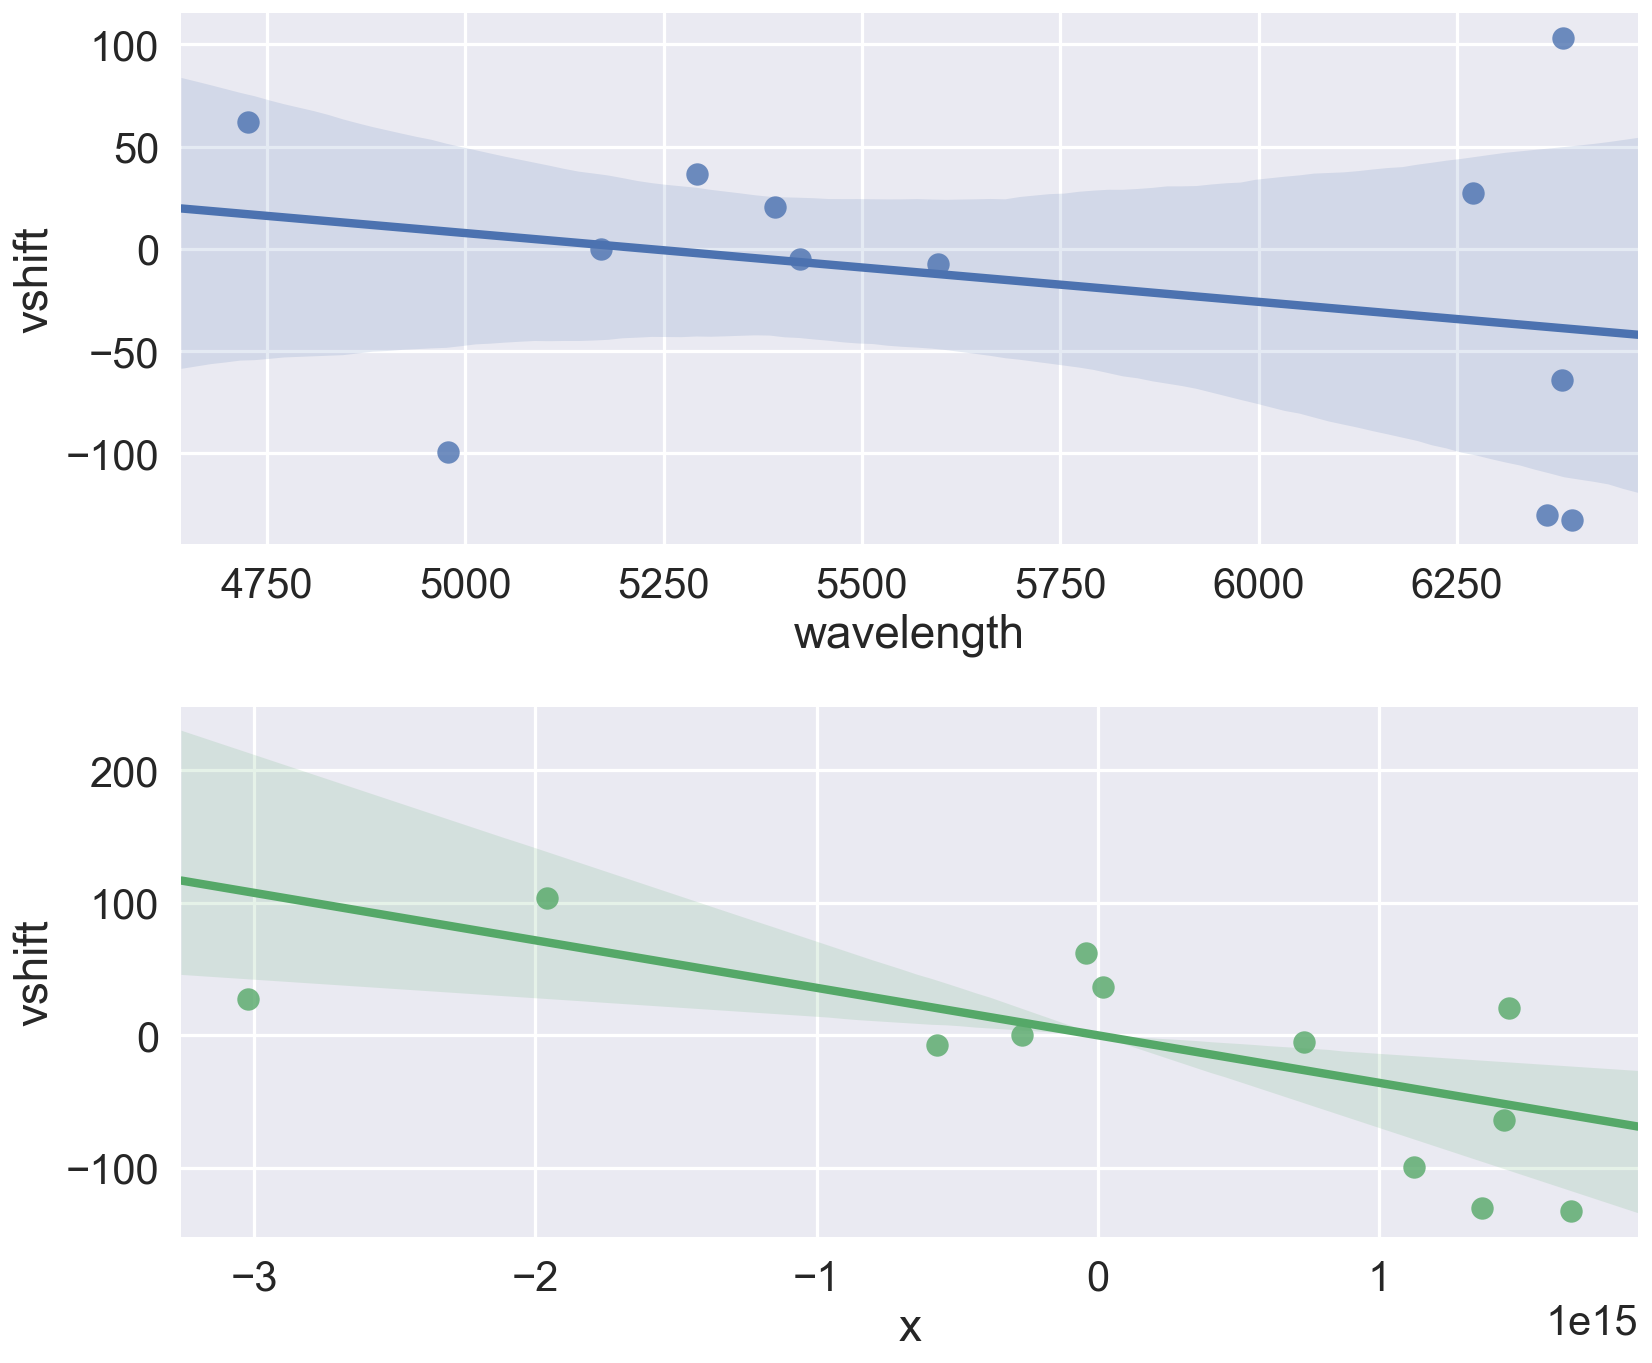

In [198]:
plot_vs_x(sys0a)

In [106]:
def sigmas(vshifts):
    return np.random.rand(len(vshifts)) * 30.0 + 50.0


     >>       4.2546172000SZ  0.0000000000     0.17171      0.14118   1.000000SN  0.000000   0.0000E+00QA  0.0000E+00  0 !
     >>       2.5595850000SZ  0.0000000000     0.14700      0.10265   1.000000SN  0.000000   0.0000E+00QA  0.0000E+00  0 !
     >>       2.6974513000SZ  0.0000000000    -0.17570      0.05530   1.000000SN  0.000000   0.0000E+00QA  0.0000E+00  0 !
     >>       3.1044038000SZ  0.0000000000    -1.02231      0.31933   1.000000SN  0.000000   0.0000E+00QA  0.0000E+00  0 !
     >>       3.1223774000SZ  0.0000000000    -0.62144      0.44735   1.000000SN  0.000000   0.0000E+00QA  0.0000E+00  0 !

# Alpha measurements as proxies for wavelength distortions

We have many measurements of $\alpha$ on both the [Keck](https://en.wikipedia.org/wiki/W._M._Keck_Observatory) and [VLT](https://en.wikipedia.org/wiki/Very_Large_Telescope) telescopes. Measurements with spectrographs both telescopes reveal statistically significant (though small in absolute terms) differences between the expected positions of absorption lines and the measured positions. 


## Hypothesis tests or statistical inference

There are many possible hypotheses that could explain these differences. To list just two: 

 - the value of the fine-structure constant ($\alpha$) has changed
 - there are velocity distortions in the instrument.
 
We can consider any velocity shift measurements as a hypothesis test. Previous studies started with the assumption that any shift in absorption lines would come as a result of a change in $\alpha$. We have the reported $\frac{\Delta \alpha}{\alpha}$ values for both the Keck and VLT samples. If we invert the hypothesis: use the measured alpha values as a system of velocity shifts, we can effectively discriminate which hypothesis best fits the data.

## Simulations

The goal will be to simulate what the velocity shifts look like if the dipole model is correct, and compare that to what we currently see.


## Discussion

The end goal of this analysis is ultimately a change in how $\frac{\Delta \alpha}{\alpha}$ is measured. The proposed recipe is:

 1. Create the best fit velocity structure as usual.
 2. Fit for relative velocity shifts between all lines (`vpfit` already allows for this).
 3. Combine all velocity shifts for all measured systems with a particular telescope.
 4. Use standard hypothesis statistical tests to discriminate the most likely hypothesis: a wavelength distortion model, or a change in the fine-structure constant.

This will likely have rather low power for any single absorption system, but for ensembles, I think that it's likely the only case 



## References

 - [Does the fine structure constant vary? A detailed investigation into systematic effects](https://arxiv.org/abs/astro-ph/0210532) (2002) by M. T. Murphy, J. K. Webb, V. V. Flambaum, S. J. Curran
 - [Further evidence for a variable fine-structure constant from Keck/HIRES QSO absorption spectra](https://arxiv.org/abs/astro-ph/0306483) (2003) by Michael T. Murphy, John K. Webb, Victor V. Flambaum
 - [Spatial variation in the fine-structure constant -- new results from VLT/UVES](https://arxiv.org/abs/1202.4758) (2012) by Julian A. King, John K. Webb, Michael T. Murphy, Victor V. Flambaum, Robert F. Carswell, Matthew B. Bainbridge, Michael R. Wilczynska, F. Elliot Koch
 - [Impact of instrumental systematic errors on fine-structure constant measurements with quasar spectra](https://arxiv.org/abs/1409.4467) (2014) by Jonathan B. Whitmore, Michael T. Murphy
 - [Artificial intelligence applied to the automatic analysis of absorption spectra. Objective measurement of the fine structure constant](https://arxiv.org/abs/1606.07393) (2016) by Matthew B. Bainbridge, John K. Webb
 - [Modeling long-range wavelength distortions in quasar absorption echelle spectra](https://arxiv.org/abs/1701.03176) (2017) by Vincent Dumont, John K. Webb
 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
from itertools import combinations, islice, takewhile
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import scipy.sparse
from scipy.constants import c
import os, sys
import warnings
from astropy import units as u
from astropy.coordinates import SkyCoord

sns.set_context('poster', font_scale=1.3)

In [2]:
from ipywidgets import interact, FloatSlider, SelectMultiple, interactive

In [4]:
vltqs = pd.read_csv('../data/vlt-transitions-new.tsv', sep='\t')
vltqs['trans'] = vltqs['transition'] + vltqs.four.astype(str)

keckqs = pd.read_csv("../data/keck-transitions-new.tsv", sep='\t')
keckqs['trans'] = keckqs.transition + keckqs.four.astype(str)

qvals = pd.read_csv("../data/qvalues.txt", sep=' ', index_col=0)

codes = pd.concat([keckqs.set_index('code')[['trans', 'wavelength']],
                   vltqs.set_index('code')[['trans', 'wavelength']]])

full_parse = pd.read_csv("../data/full-parse.tsv", sep='\t')

In [3]:
def shifted_velocity(del_alpha, q, lamb):
#     TODO: have I flipped the negative sign?
    # vj =v0 + ∆α xj, xj =−2cqjλ0j,
    x = -2 * c * q * lamb
    return del_alpha * x * 1e-8 * 1e-6

def observed_shifts(telescope='VLT'):
    waves = []
    shifts = []
    for index, row in full_parse[full_parse.source.eq(telescope)].iterrows():
        for tran in row['transition'].split():
            rest_wave = qvals.loc[codes.loc[tran].trans].wave
            measured_wave = rest_wave * (1 + row.zabs)
            qval = qvals.loc[codes.loc[tran].trans].qval
            waves.append(measured_wave)
            shifts.append(shifted_velocity(row.da, qval, rest_wave))
    return np.array(waves), np.array(shifts)

In [5]:
species = set([spec[0] for spec in qvals.index.str.split('I')])
colors = sns.color_palette(n_colors=len(species))
plot_colors = {}
for index, specie in enumerate(sorted(species)):
    plot_colors[specie] = colors[index]

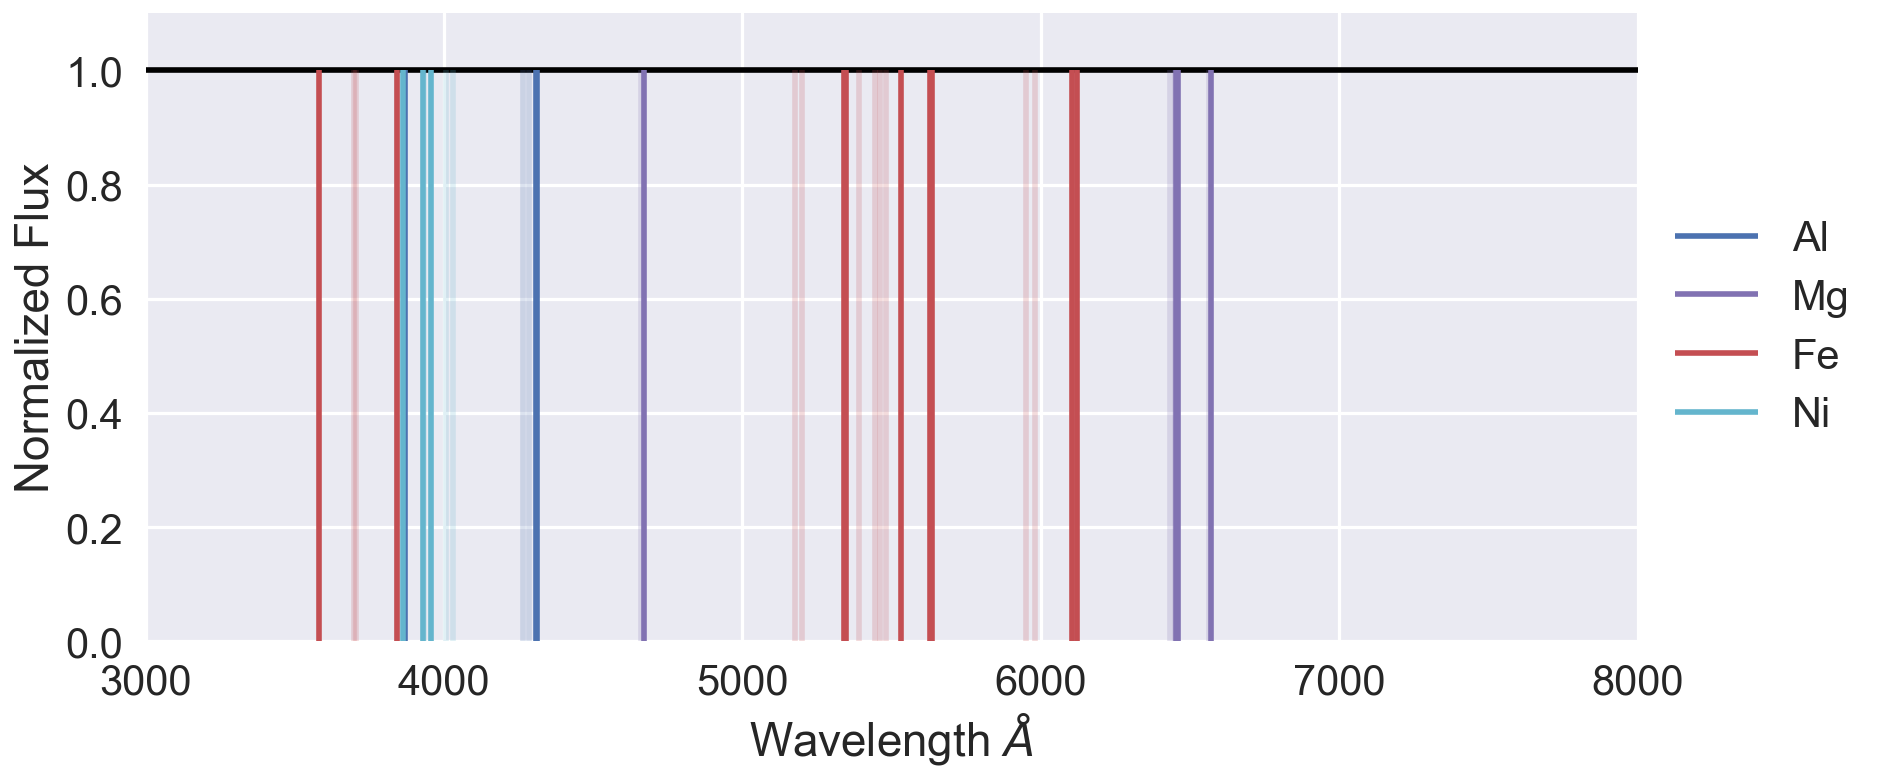

In [11]:
def plot_absorption(specie=['Al', 'Mg'],
                    z=1.3,
                    daa=0.05,
                   ):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hlines(1, 0, 10000)
    for tran, row in qvals[qvals.index.str.startswith(tuple(specie))].iterrows():
        ax.vlines((1.0 + z) * row.wave + row.qval * ((daa + 1)**2.0-1.0), 
                      0, 1, color=plot_colors[tran[:2]])
        ax.vlines((1.0 + z) * row.wave, 
                      0, 1, color=plot_colors[tran[:2]], alpha=0.2)
        
    ax.set_xlim(3000, 8e3)
    ax.set_ylim(0, 1.1)
    ax.set_ylabel("Normalized Flux")
    ax.set_xlabel(r"Wavelength $\AA$")
    
    for spec in specie:
        ax.vlines(-1, -1, 0, color=plot_colors[spec], label=spec)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

plot_absorption(specie=['Al', 'Mg', 'Fe', 'Ni'], )

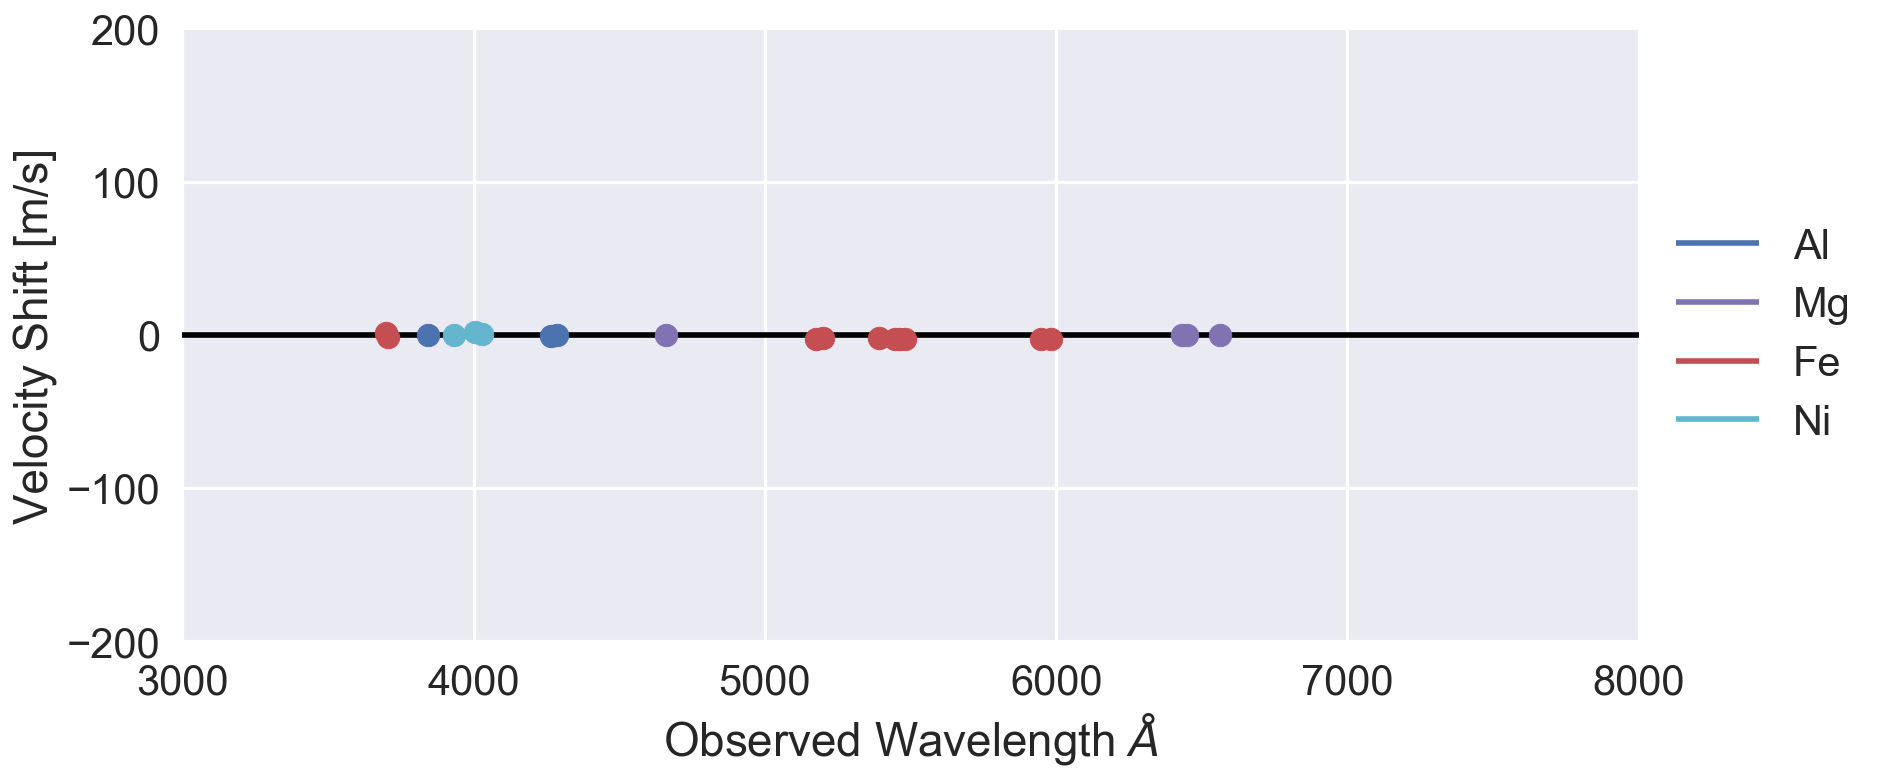

In [51]:
def plot_shift(specie=['Al', 'Mg'],
                    z=1.3,
                    daa=0.05,
                   ):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hlines(0, 0, 10000)
    for tran, row in qvals[qvals.index.str.startswith(tuple(specie))].iterrows():
        ax.scatter((1.0 + z) * row.wave, 
#                    row.qval * ((daa + 1)**2.0-1.0),
                   shifted_velocity(daa, row.qval, (1.0 + z) * row.wave),
                   color=plot_colors[tran[:2]], zorder=3)
        
    ax.set_xlim(3000, 8e3)
    ax.set_ylim(-200, 200)
    ax.set_ylabel("Velocity Shift [m/s]")
    ax.set_xlabel(r"Observed Wavelength $\AA$")
    
    for spec in specie:
        ax.vlines(-1, -1, 0, color=plot_colors[spec], label=spec, zorder=-3)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()

plot_shift(specie=['Al', 'Mg', 'Fe', 'Ni'], )

In [52]:
redshift_slider = FloatSlider(value=2.1, min=0.0, max=3.5)
alpha_slider = FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1)
species_select = SelectMultiple(options=['Al', 'Cr', 'Fe', 'Mg', 'Mn', 'Ni', 'Si'],
                                description="Species",
                                value=['Al', 'Fe']
                               )
# w = interactive(plot_absorption, 
#                 specie=species_select,
#                 z=redshift_slider,
#                 daa=alpha_slider,
#                )
shift_interactive = interactive(plot_shift, 
                specie=species_select,
                z=redshift_slider,
                daa=alpha_slider,
               )

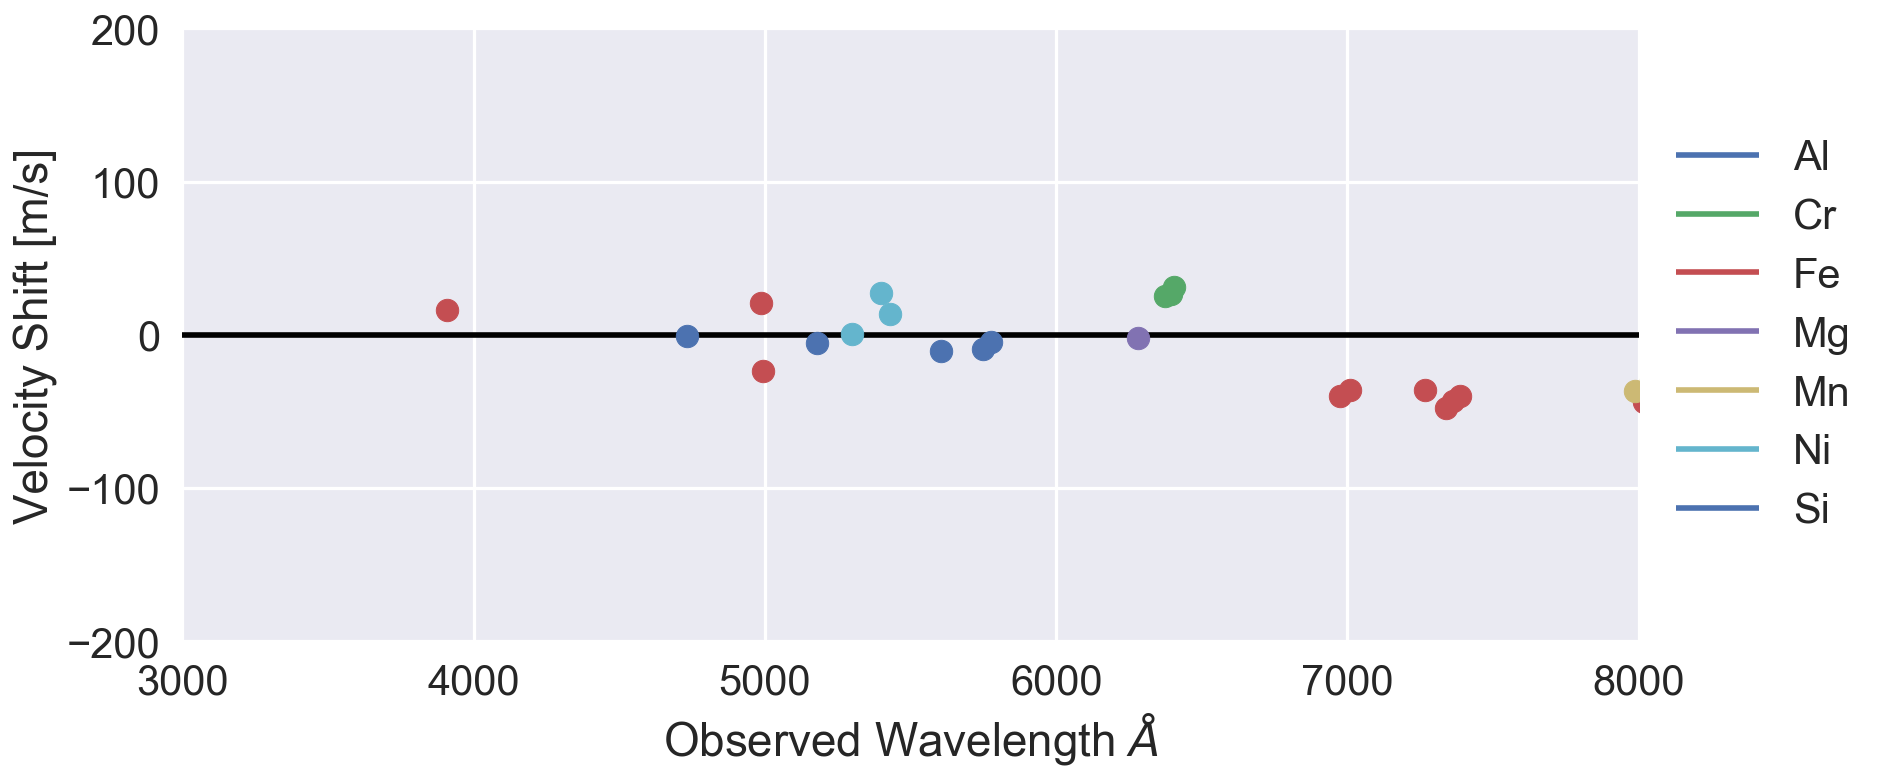

In [53]:
shift_interactive

In [42]:
full_parse.head()

#J2000   zem     zabs     da    eda sample source  sigflag  \
0  J000149-015940  2.31  2.09510   0.34   7.27     B1   Keck        2   
1  J000149-015940  2.31  2.15390  36.05  39.54     B1   Keck        1   
2  J000322-260316  4.11  1.43420 -12.53  11.67      C   Keck        1   
3  J000322-260316  4.11  3.38970 -78.43  35.48      C   Keck        1   
4  J000520+052410  1.90  0.59137 -31.05  24.33      C   Keck        1   

   imrotator               transition  
0          0  d g h i j k l s t u v w  
1          0                  d f g l  
2          1                  b c p r  
3          1                  d g l m  
4          0              b c n p q r

In [15]:
def plot_shifts(telescope='VLT'):
    fig, ax = plt.subplots(figsize=(12, 6))
    w, s = observed_shifts(telescope=telescope)
    sns.regplot(w, s, lowess=True, scatter_kws={'alpha':0.2}, ax=ax)
    ax.set_ylim(-200, 200)
    ax.set_xlabel(r"Observed Wavelength [$\AA$]")
    ax.set_ylabel("Velocity [m/s]")
    ax.set_title(telescope)
    fig.tight_layout()

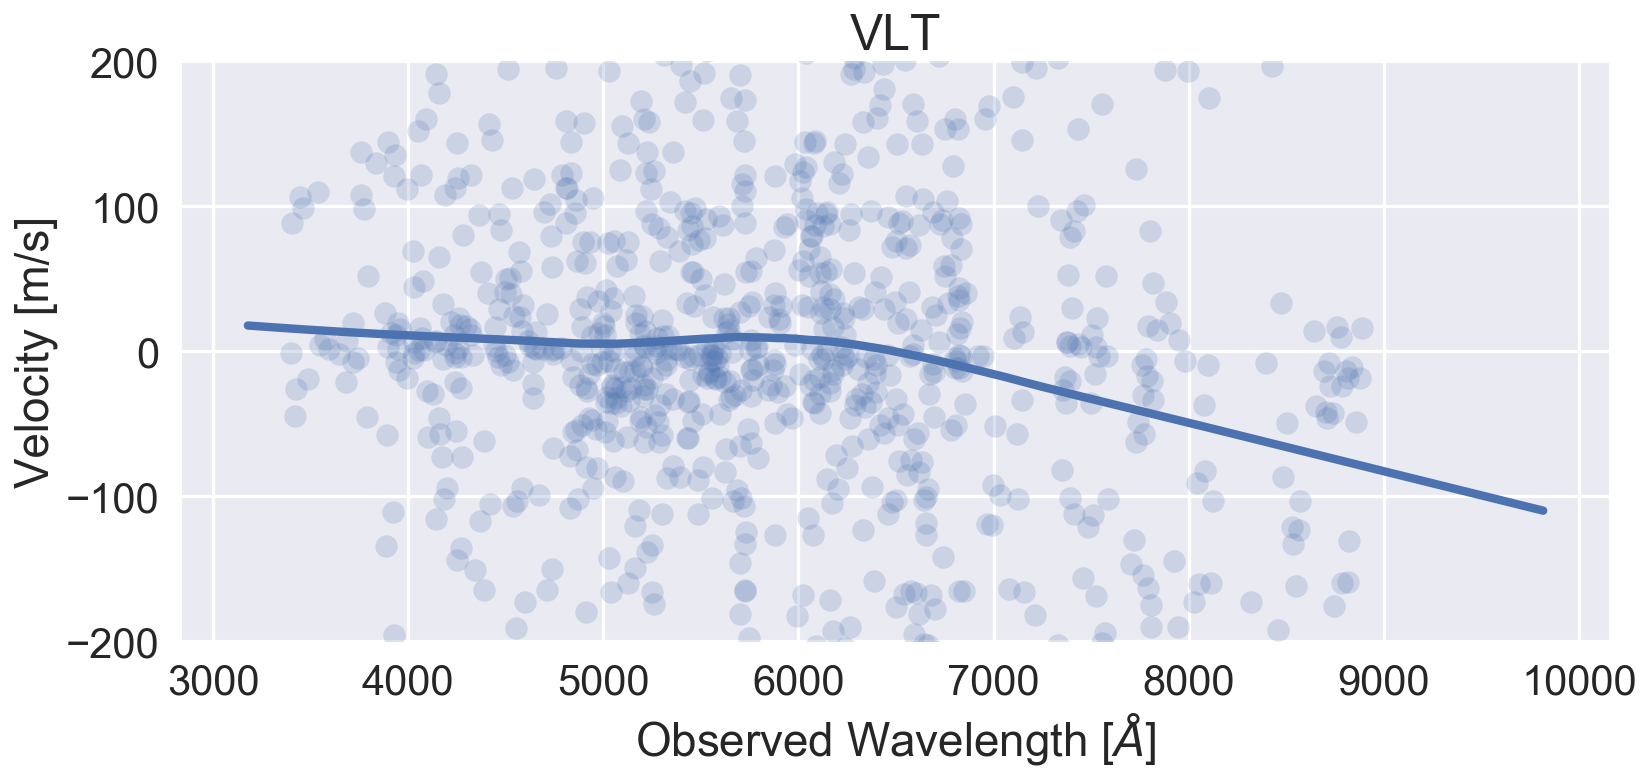

In [16]:
plot_shifts(telescope='VLT')

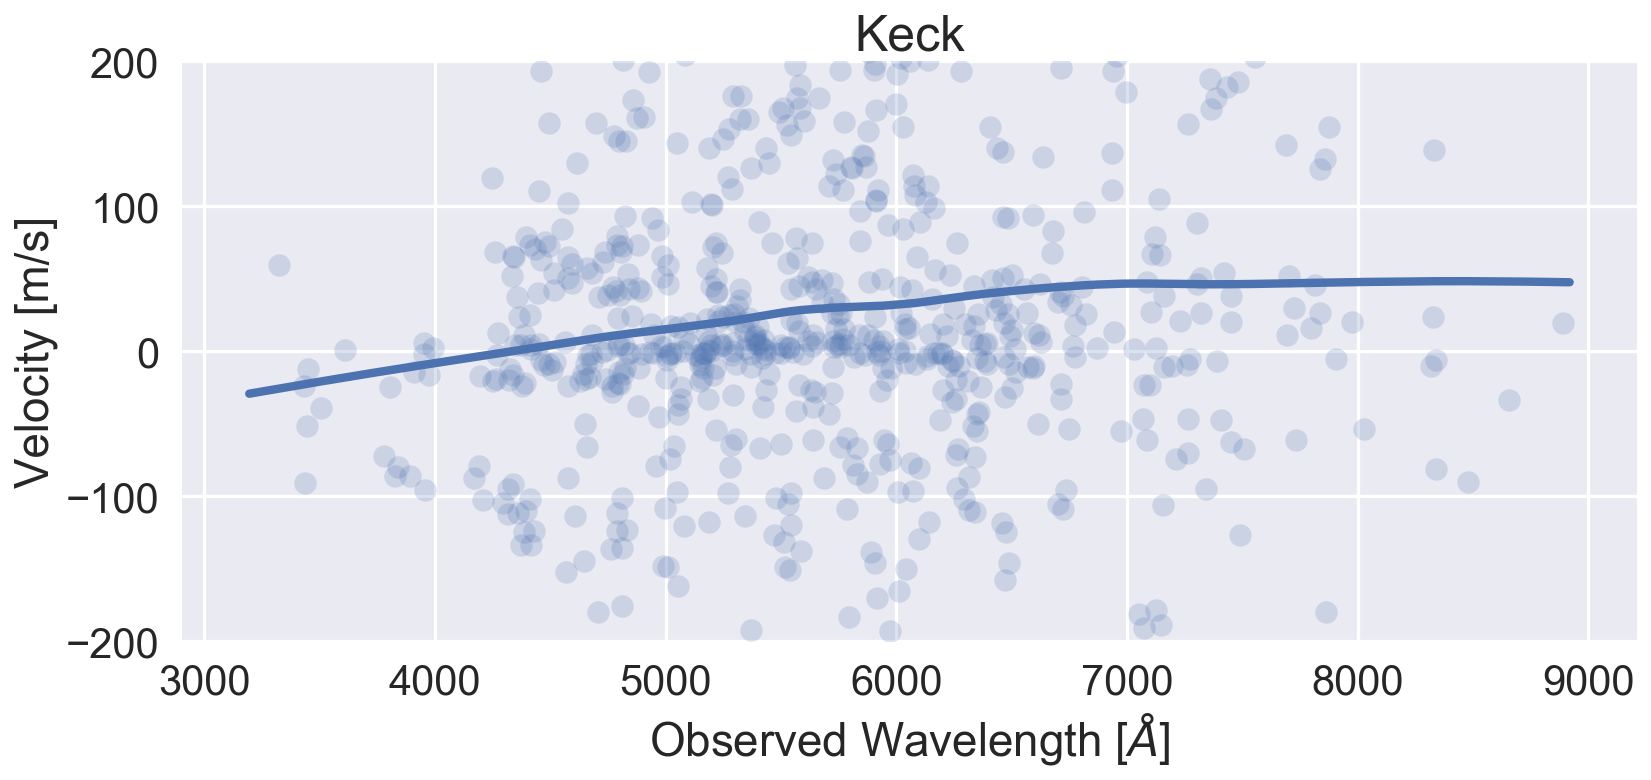

In [17]:
plot_shifts(telescope='Keck')

In [59]:
def plot_all(title='Keck + VLT'):
    fig, ax = plt.subplots(figsize=(12, 8))
    telescope='VLT'
    w, s = observed_shifts(telescope=telescope)
    sns.regplot(w, s, lowess=True, scatter_kws={'alpha':0.5}, ax=ax, label=telescope)
    telescope='Keck'
    w, s = observed_shifts(telescope=telescope)
    sns.regplot(w, s, lowess=True, scatter_kws={'alpha':0.5}, ax=ax, label=telescope)
    ax.set_xlim(2000, 10000)
    ax.set_ylim(-200, 200)
    ax.legend()
    ax.set_xlabel(r"Observed Wavelength [$\AA$]")
    ax.set_ylabel("Velocity [m/s]")
    ax.set_title(title)
    fig.tight_layout()

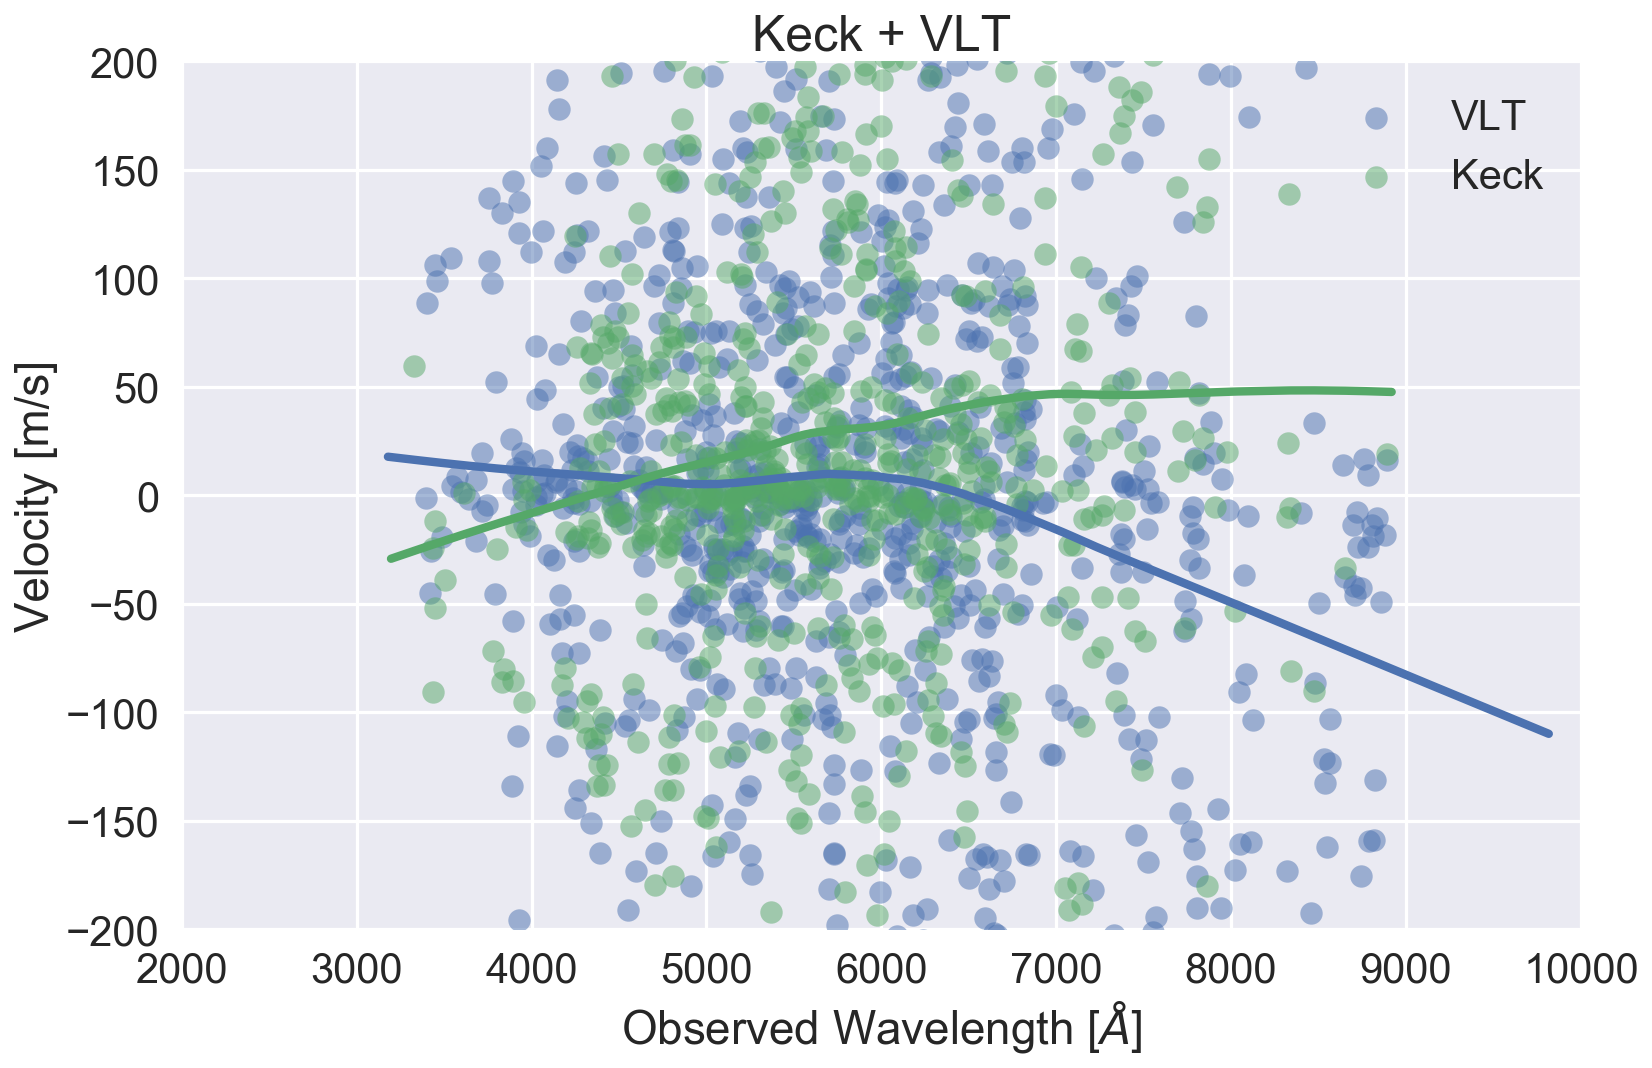

In [60]:
plot_all()

In [61]:
def observed_shifts_by_sample(sample='A'):
    waves = []
    shifts = []
    for index, row in full_parse[full_parse['sample'] == sample].iterrows():
        for tran in row['transition'].split():
            rest_wave = qvals.loc[codes.loc[tran].trans].wave
            measured_wave = rest_wave * (1 + row.zabs)
            qval = qvals.loc[codes.loc[tran].trans].qval
            waves.append(measured_wave)
            shifts.append(shifted_velocity(row.da, qval, rest_wave))
    return np.array(waves), np.array(shifts)

def plot_samples():
    fig, ax = plt.subplots(figsize=(12, 8))
    telescope='VLT'
    for sample in sorted(full_parse['sample'].unique()):
        w, s = observed_shifts_by_sample(sample=sample)
        sns.regplot(w, s, lowess=True, scatter_kws={'alpha':0.5}, ax=ax, label=sample)
    ax.set_ylim(-400, 400)
    ax.set_xlim(2000, 10000)
    ax.legend()
#     frame = ax.get_frame()
#     frame.set_alpha(1.0)
    ax.set_xlabel(r"Observed Wavelength [$\AA$]")
    ax.set_ylabel("Velocity [m/s]")
    ax.set_title('Samples')
    fig.tight_layout()

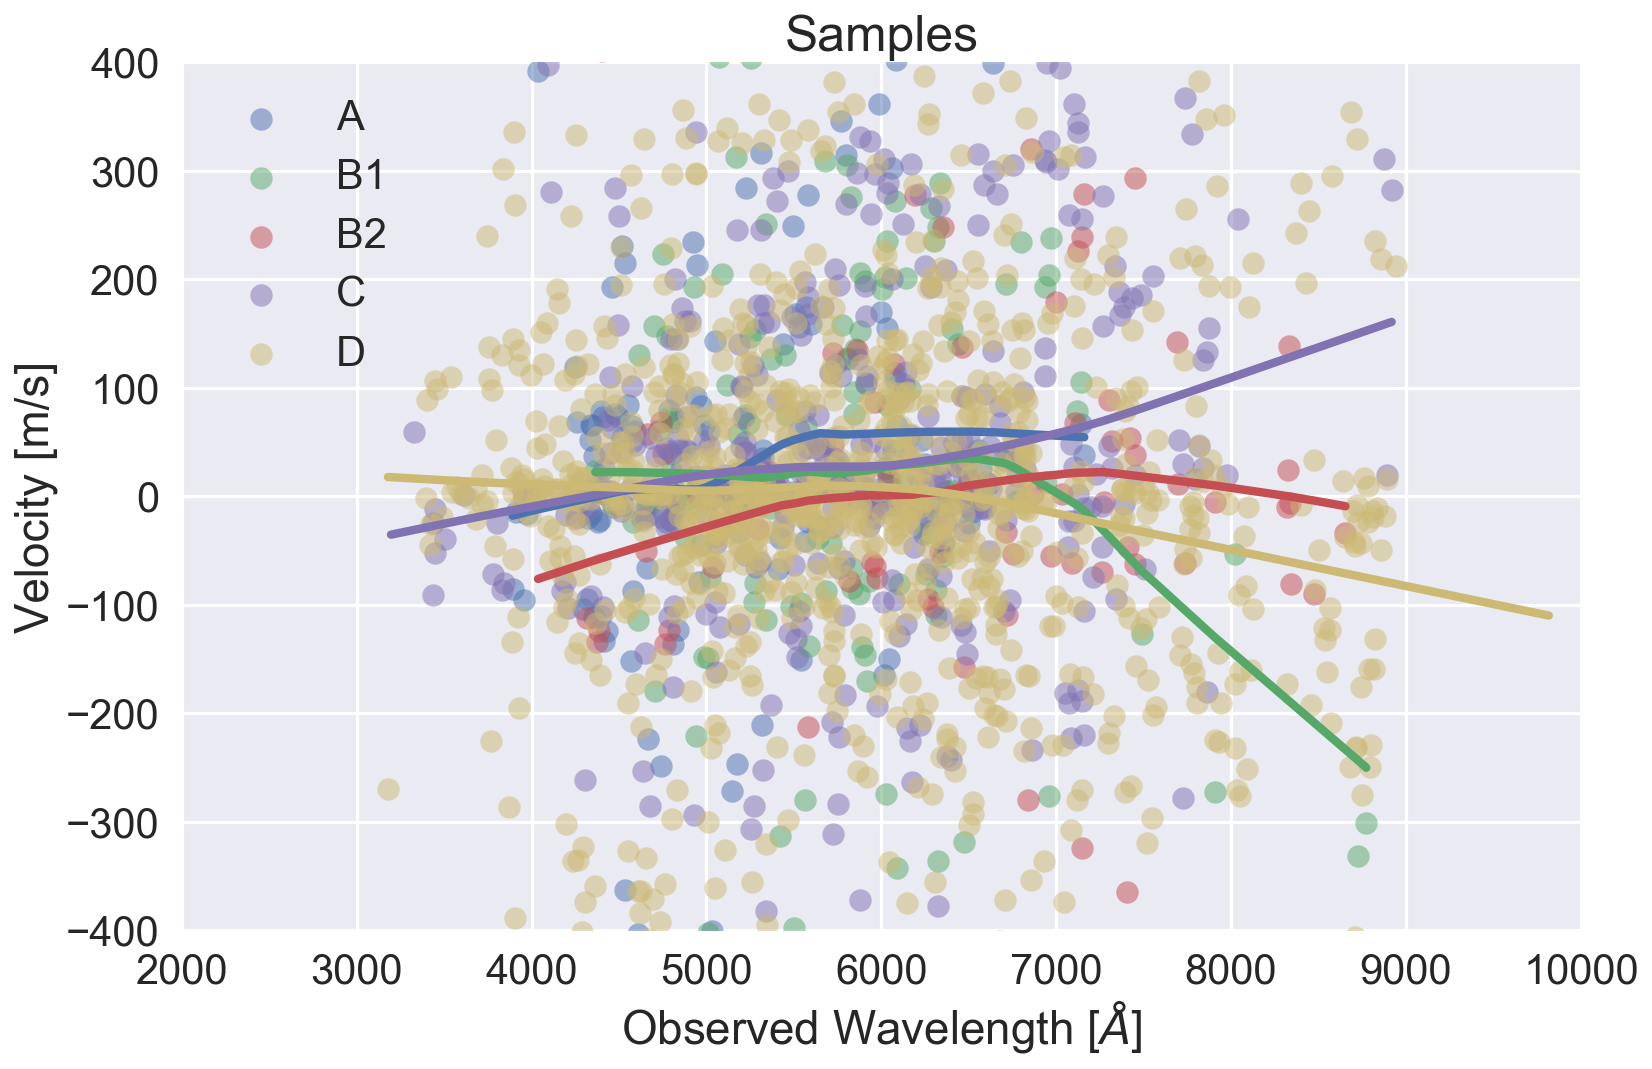

In [62]:
plot_samples()

## Simulations

Generate velocity shifts for the dipole hypothesis.

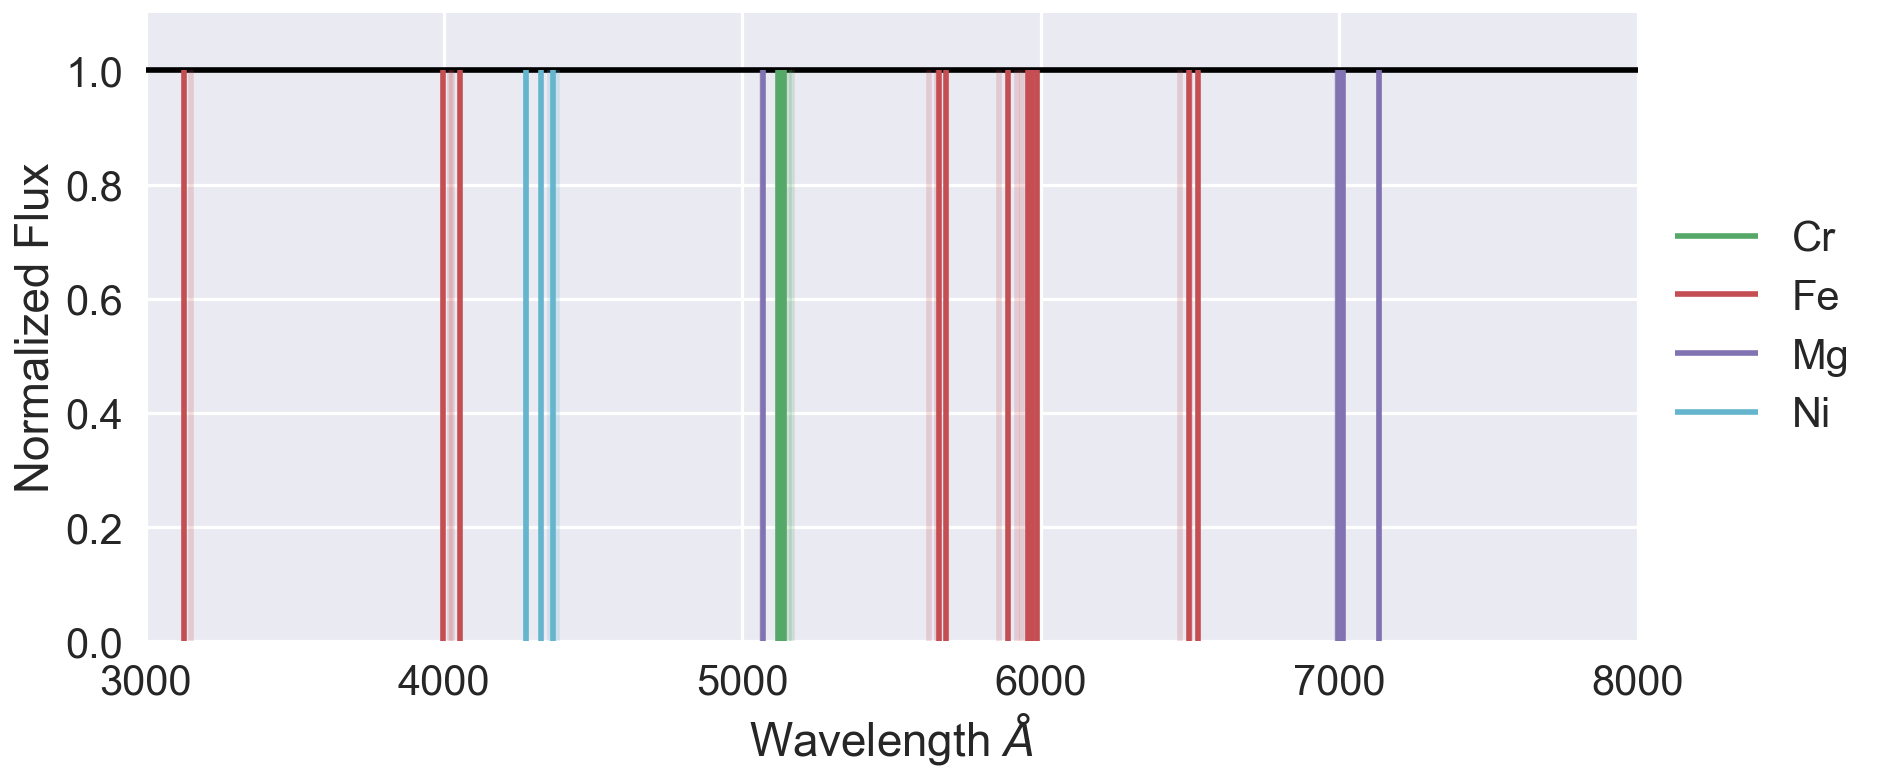

In [54]:
w

In [74]:
def plot_sim(telescope='VLT', use_dipole=True):
    fig, ax = plt.subplots(figsize=(12, 6))
    w, s = observed_shifts(telescope=telescope)
    sns.regplot(w, s, lowess=True, scatter_kws={'alpha':0.05}, ax=ax, label='Implied by Measured VLT')
    w, s = simulated_shifts(telescope=telescope, use_dipole=use_dipole)
    sns.regplot(w, s, lowess=True, scatter_kws={'alpha':0.05}, ax=ax, label='Implied by Dipole VLT')
    ax.set_ylim(-200, 200)
    ax.legend()
    ax.set_xlabel(r"Observed Wavelength [$\AA$]")
    ax.set_ylabel("Velocity [m/s]")
    ax.set_title('Simulated velocity shifts for ' + telescope)
    fig.tight_layout()

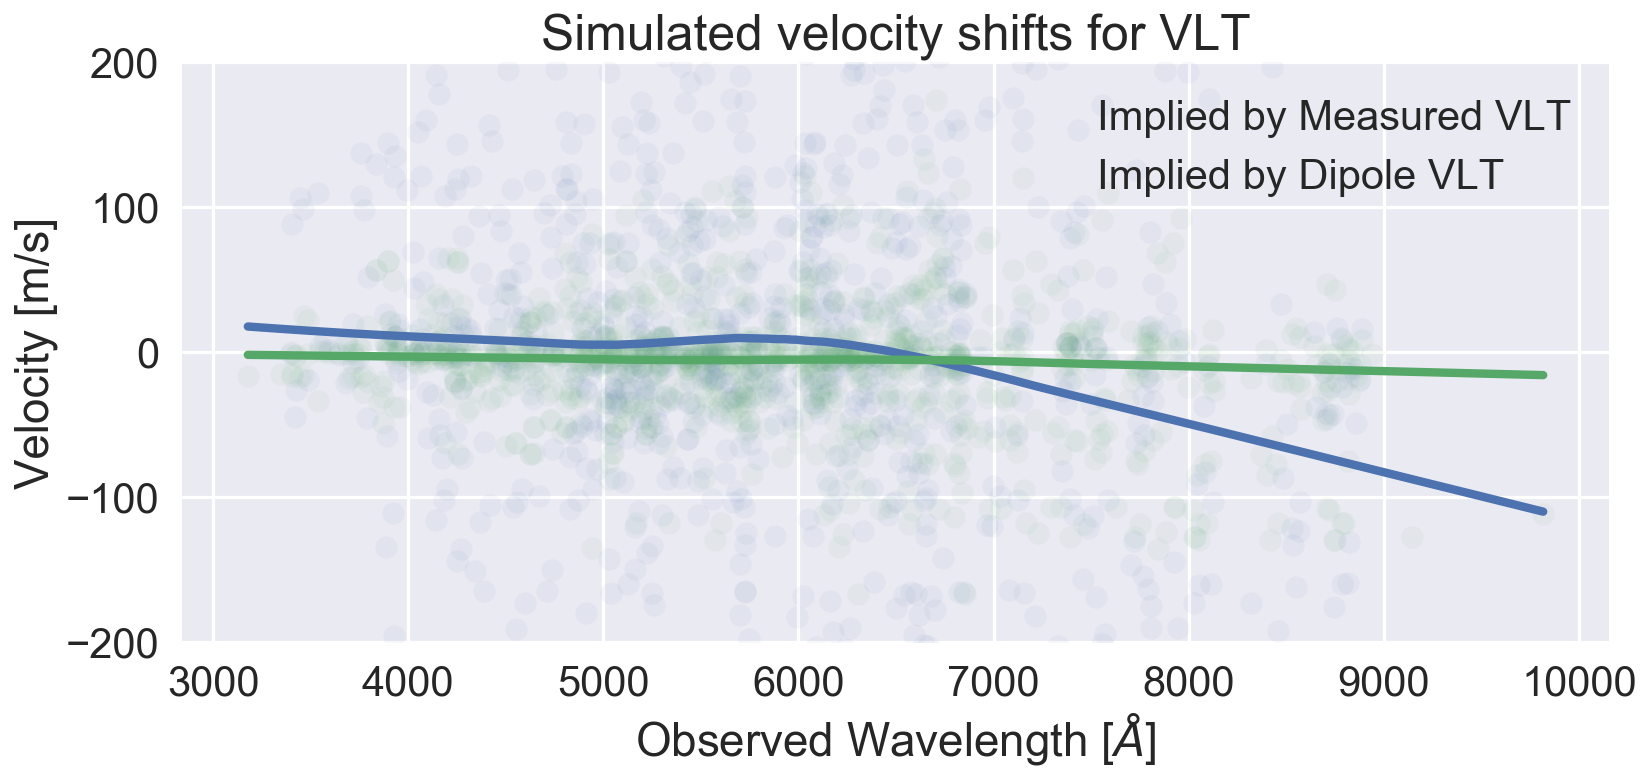

In [75]:
plot_sim()

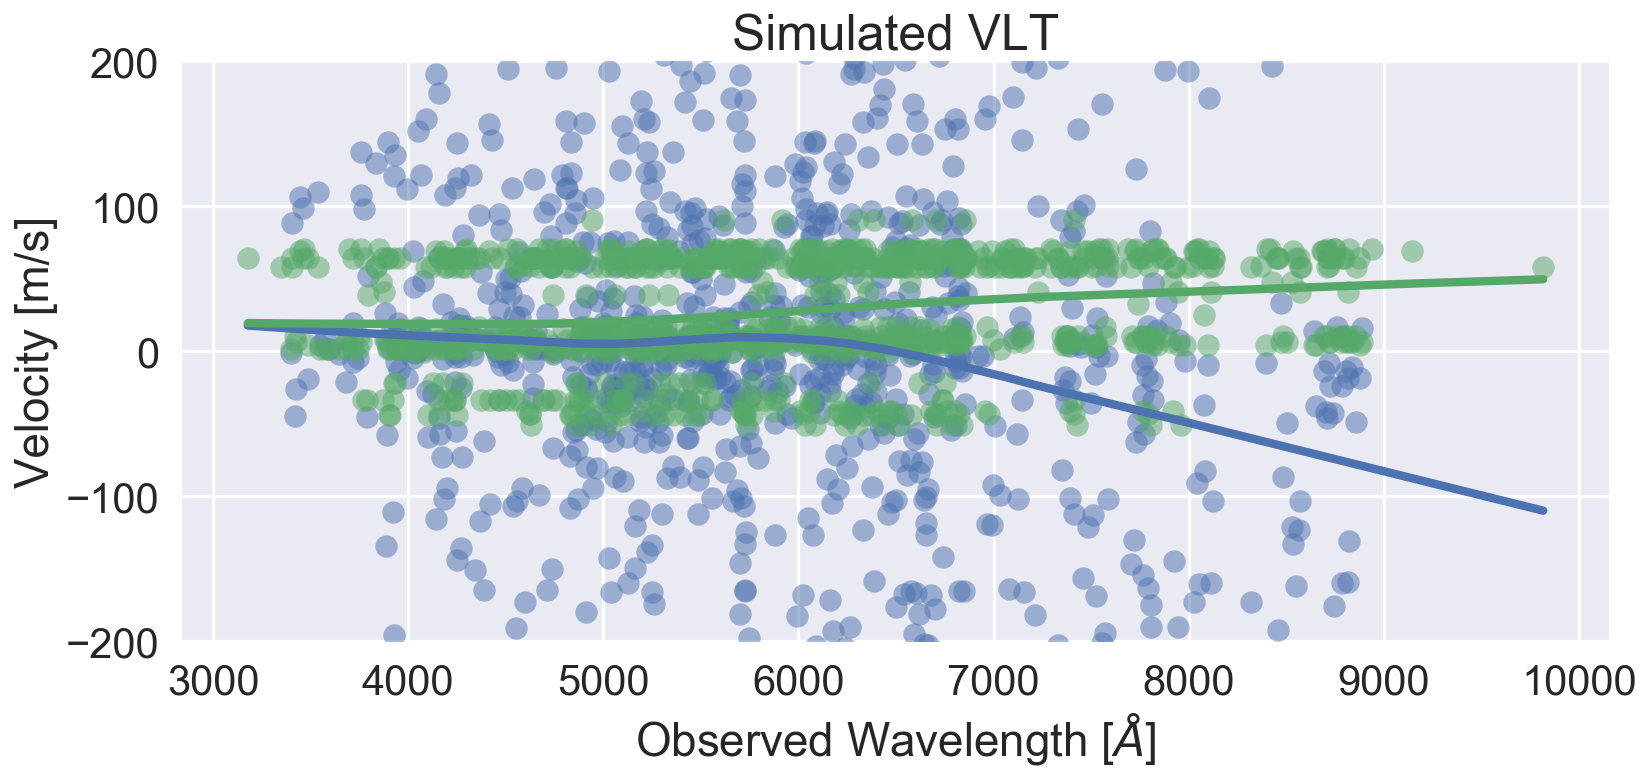

In [69]:
def simulated_shifts(telescope='VLT', use_dipole=True):
    waves = []
    shifts = []
    for index, row in full_parse[full_parse.source.eq(telescope)].iterrows():
        for tran in row['transition'].split():
            rest_wave = qvals.loc[codes.loc[tran].trans].wave
            measured_wave = rest_wave * (1 + row.zabs)
            qval = qvals.loc[codes.loc[tran].trans].qval
            waves.append(measured_wave)
#             da = row.da
            if use_dipole:
                da = dipole_alpha(row['#J2000'])
            else:
                da = -3.0
            shifts.append(shifted_velocity(da, qval, rest_wave))
    return np.array(waves), np.array(shifts)

plot_sim(use_dipole=False)

## Hypothesis test

I think that a non-parametric test for $\alpha$ would be to fit for all velocity shifts as independent shifts. 

The general procedure would be thus:

 - fit velocity shifts per wavelength region (with errors). 

#J2000   zem    zabs    da   eda sample source  sigflag  \
152  J004131-493611  3.24  2.2485 -12.3  6.72      D    VLT        3   

     imrotator                                         transition  
152          0  j1 j2 j3 j6 j7 j8 c1 d1 d2 e2 h1 h2 h3 l1 l2 k...

In [88]:
row['transition'].values

array(['j1 j2 j3 j6 j7 j8 c1 d1 d2 e2 h1 h2 h3 l1 l2 k1 i1 i2'], dtype=object)

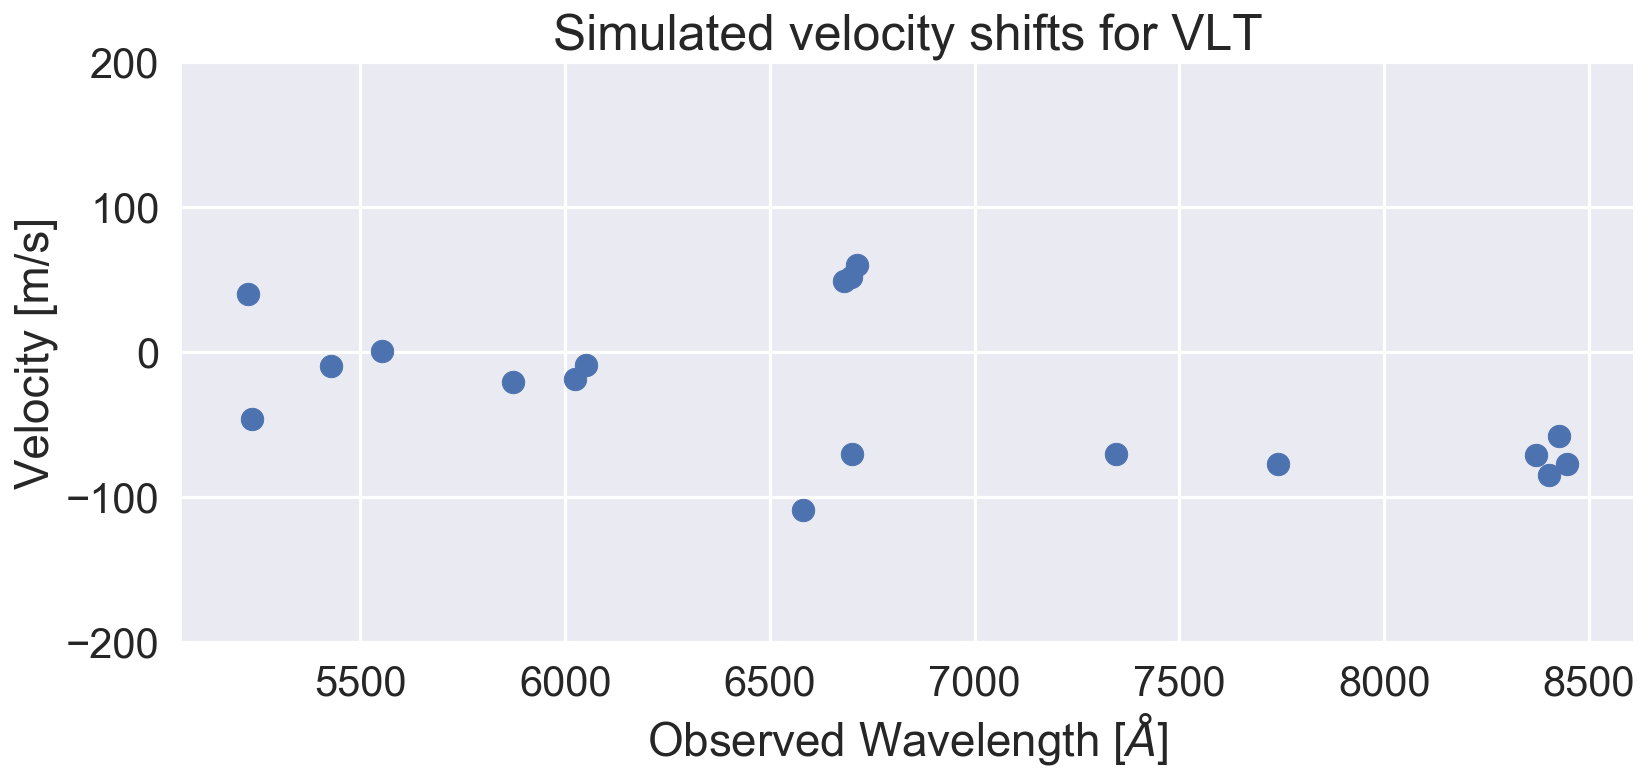

In [99]:
telescope = 'VLT'
row = full_parse[full_parse.source.eq(telescope)].sample(1,
                                                   random_state=2
                                                  ).iloc[0]
waves = []
shifts = []
for tran in row['transition'].split():
    rest_wave = qvals.loc[codes.loc[tran].trans].wave
    measured_wave = rest_wave * (1 + row.zabs)
    qval = qvals.loc[codes.loc[tran].trans].qval
    waves.append(measured_wave)
#             da = row.da
#     if use_dipole:
    da = dipole_alpha(row['#J2000'])
#     else:
#         da = -3.0
    shifts.append(shifted_velocity(da, qval, rest_wave))
wav, shift = np.array(waves), np.array(shifts)



fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(wav, shift)
ax.set_ylim(-200, 200)
# ax.legend()
ax.set_xlabel(r"Observed Wavelength [$\AA$]")
ax.set_ylabel("Velocity [m/s]")
ax.set_title('Simulated velocity shifts for ' + telescope)
fig.tight_layout()

In [ ]:
telescope = 'VLT'
row = full_parse[full_parse.source.eq(telescope)].sample(1,
                                                   random_state=2
                                                  ).iloc[0]
waves = []
shifts = []
for tran in row['transition'].split():
    rest_wave = qvals.loc[codes.loc[tran].trans].wave
    measured_wave = rest_wave * (1 + row.zabs)
    qval = qvals.loc[codes.loc[tran].trans].qval
    waves.append(measured_wave)
#             da = row.da
#     if use_dipole:
    da = dipole_alpha(row['#J2000'])
#     else:
#         da = -3.0
    shifts.append(shifted_velocity(da, qval, rest_wave))
wav, shift = np.array(waves), np.array(shifts)



fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(wav, shift)
ax.set_ylim(-200, 200)
# ax.legend()
ax.set_xlabel(r"Observed Wavelength [$\AA$]")
ax.set_ylabel("Velocity [m/s]")
ax.set_title('Simulated velocity shifts for ' + telescope + " " + str(np.round(da, 2)))
fig.tight_layout()

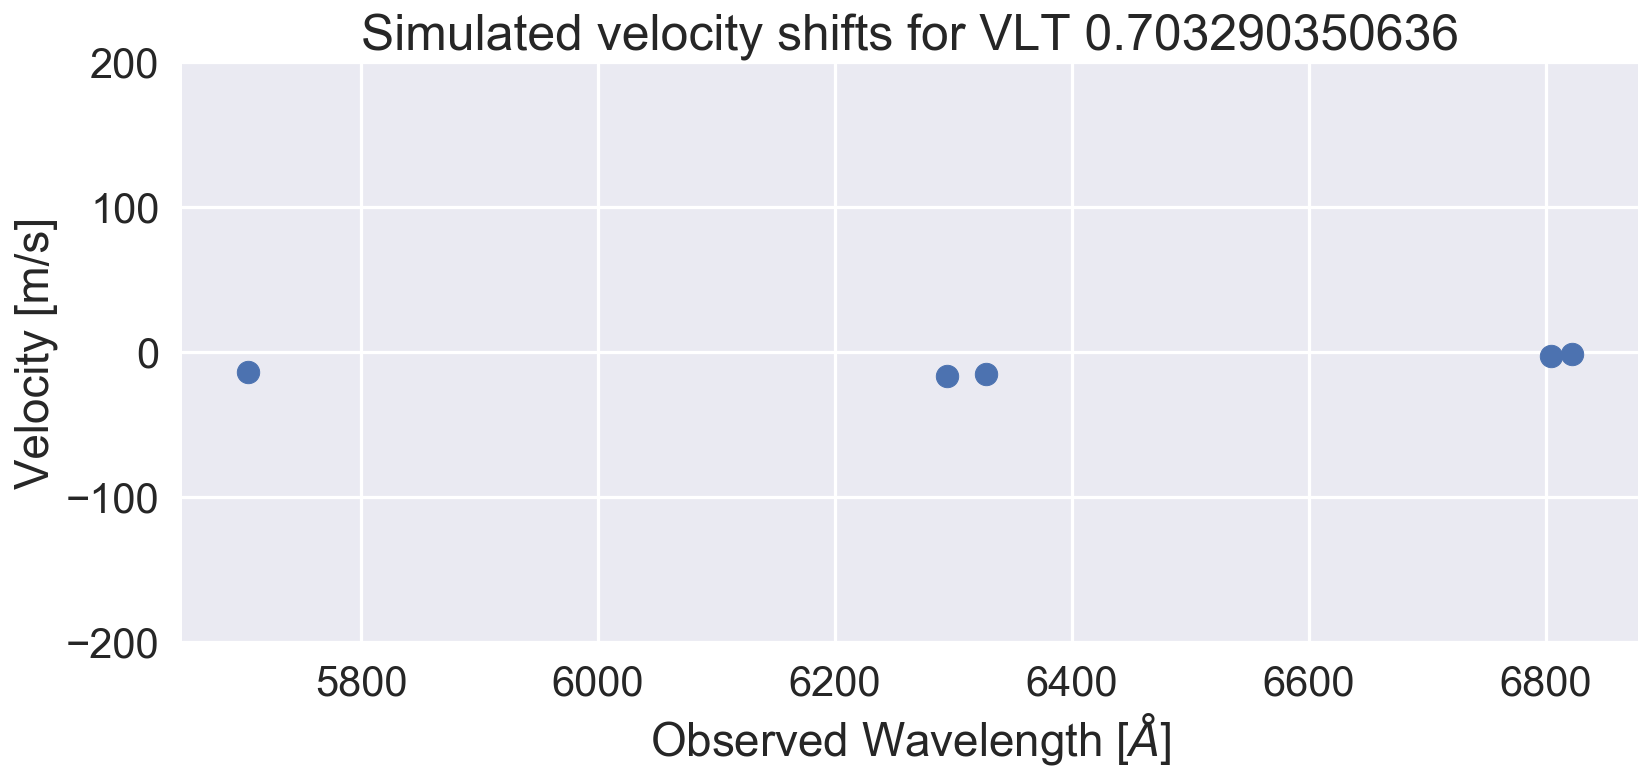

In [113]:
telescope = 'VLT'
row = full_parse[full_parse.source.eq(telescope)].sample(1,
                                                   random_state=3
                                                  ).iloc[0]
waves = []
shifts = []
for tran in row['transition'].split():
    rest_wave = qvals.loc[codes.loc[tran].trans].wave
    measured_wave = rest_wave * (1 + row.zabs)
    qval = qvals.loc[codes.loc[tran].trans].qval
    waves.append(measured_wave)
#             da = row.da
#     if use_dipole:
    da = dipole_alpha(row['#J2000'])
#     else:
#         da = -3.0
    shifts.append(shifted_velocity(da, qval, rest_wave))
wav, shift = np.array(waves), np.array(shifts)



fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(wav, shift)
ax.set_ylim(-200, 200)
# ax.legend()
ax.set_xlabel(r"Observed Wavelength [$\AA$]")
ax.set_ylabel("Velocity [m/s]")
ax.set_title('Simulated velocity shifts for ' + telescope + " " + str(da))
fig.tight_layout()

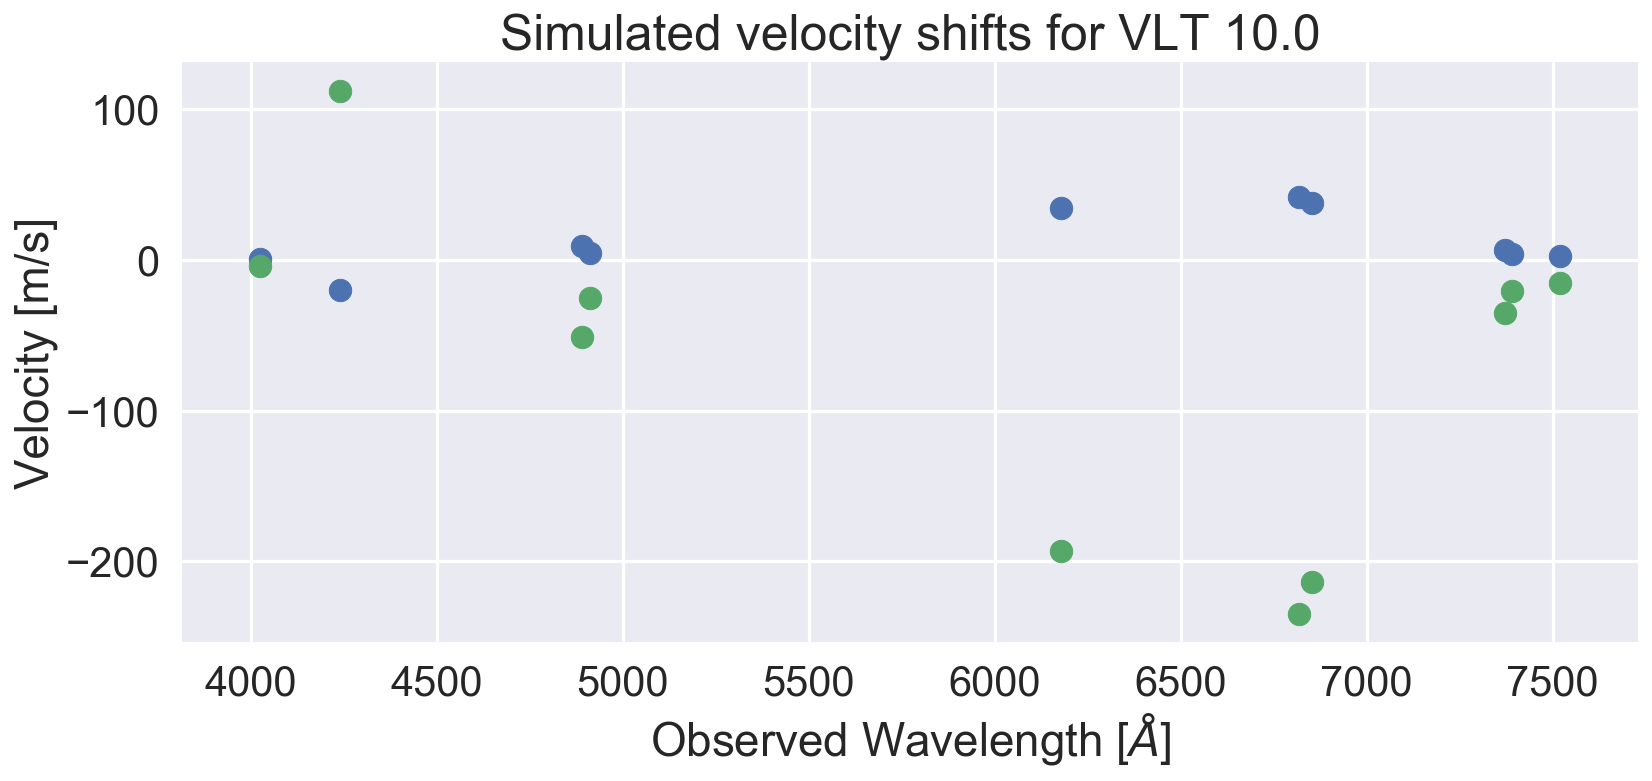

In [112]:
telescope = 'VLT'
row = full_parse[full_parse.source.eq(telescope)].sample(1,
                                                   random_state=8
                                                  ).iloc[0]
waves = []
shifts = []
for tran in row['transition'].split():
    rest_wave = qvals.loc[codes.loc[tran].trans].wave
    measured_wave = rest_wave * (1 + row.zabs)
    qval = qvals.loc[codes.loc[tran].trans].qval
    waves.append(measured_wave)
    da = dipole_alpha(row['#J2000'])
    shifts.append(shifted_velocity(da, qval, rest_wave))
wav, shift = np.array(waves), np.array(shifts)


fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(wav, shift)

waves = []
shifts = []
for tran in row['transition'].split():
    rest_wave = qvals.loc[codes.loc[tran].trans].wave
    measured_wave = rest_wave * (1 + row.zabs)
    qval = qvals.loc[codes.loc[tran].trans].qval
    waves.append(measured_wave)
    da = row.da
    shifts.append(shifted_velocity(da, qval, rest_wave))
wav, shift = np.array(waves), np.array(shifts)

ax.scatter(wav, shift)
ax.set_xlabel(r"Observed Wavelength [$\AA$]")
ax.set_ylabel("Velocity [m/s]")
ax.set_title('Simulated velocity shifts for ' + telescope + " " + str(da))
fig.tight_layout()